**Coursebook: Introduction to Machine Learning 2**

- Part 6 of Python Data Analytics Specialization
- Course Length: 9 Hours
- Last Updated: July 2024

---

- Develop by [Algoritma](https://algorit.ma/)'s product division and instructors team

# Background

The coursebook is part of the **Python Machine Learning** prepared by [Algoritma](https://algorit.ma/). The coursebook is intended for a restricted audience only, i.e. the individuals and organizations having received this coursebook directly from the training organization. It may not be reproduced, distributed, translated or adapted in any form outside these individuals and organizations without permission.

Algoritma is a data science education center based in Jakarta. We organize workshops and training programs to help working professionals and students gain mastery in various data science sub-fields: data visualization, machine learning, data modeling, statistical inference etc.

# Introduction to Machine Learning 2
## Training Objectives

- **Working with Time Series**
  - Data Preprocessing
  - Visualization: Multiple vs Multivariate Time Series
- **Modeling using `prophet`**
  - Baseline Model
  - Trend Component
  - Seasonality Component
  - Holiday Effects
- **Forecasting Evaluation**
  - Train-Test Split
  - Evaluation Metrics: MAPE
- **Hyperparameter Tuning**

# Time Series Forecasting using Prophet (`prophet`)

The coursebook is part of the **Data Science in Python Specialization** prepared by [Algoritma](https://algorit.ma/). The coursebook is intended for a restricted audience only, i.e. the individuals and organizations having received this coursebook directly from the training organization. It may not be reproduced, distributed, translated or adapted in any form outside these individuals and organizations without permission.

**Algoritma** is a data science education center based in Jakarta. We organize workshops and training programs to help working professionals and students gain mastery in various data science sub-fields: data visualization, machine learning, data modeling, statistical inference, etc.

## Introduction

The dataset provided for analysis is a time-series dataset consisting of daily sales data from one of the largest **Russian software firms - 1C Company**. The dataset spans several years and contains information on the daily sales of various software products across different stores. The data is highly granular and includes details such as product ID, store ID, date, and daily sales figures.

The software products sold by the company are diverse and range from business software solutions to entertainment software. The company is known for its wide range of software products, and the dataset reflects this diversity, with information on the sales of different software products across various stores.

Our objective as data analysts is to predict the total sales for every product and store in the next month. This requires us to use time-series forecasting techniques to accurately predict the sales figures for each product and store in the coming month. Our analysis will help the company optimize its inventory management and sales strategies, as well as identify opportunities for growth and expansion.

As data analysts, we are responsible for solving this problem by conducting the proper analysis to predict the sales figures accurately. We need to evaluate various time-series forecasting techniques available and select the one that is most suitable for our data to provide accurate and useful predictions for the company. Additionally, we need to consider other factors that may affect sales, such as market trends, competition, economic conditions, and others.

By conducting accurate and proper analysis, we can help the company make better decisions and optimize their business performance in the future.

To read and load the dataset provided by 1C Company in a data analysis software or programming language such as Python. For example, the following code can be used to read the dataset file named `"sales_train.csv"` into a pandas dataframe:


### Regression vs Forecasting

The fundamental difference between time series and regression is that, in regression, to predict a value of `Y`, it is influenced by several factors such as `x1, x2,.., xn`. On the other hand, in time series, to predict a value of Y, it is influenced by its own past value ($Y_{t-1}$).

*Regression*

$$y = \beta_0+\beta_1*x_1+\beta_2*x_2+...+\beta_n*x_n$$

*Time Series*

$$y_t = \beta_0+\beta_1*y_{t-1}+\beta_2*y_{t-2}+...+\beta_n*y_{t-n}$$

The first equation represents a linear regression model, where the value of the dependent variable y is predicted based on the values of one or more independent variables `x1, x2, ..., xn`. This model assumes that there is a linear relationship between the dependent variable and the independent variables, and the regression coefficients (β0, β1, β2, ..., βn) are estimated to determine the strength and direction of the relationship.

On the other hand, the second equation represents a time series model, specifically an autoregressive model. Here, the value of the dependent variable at time `t (yt)` is predicted based on its previous values at times `t-1, t-2, ..., t-n`. This model assumes that the value of the dependent variable is dependent on its past values and any external factors that may affect it.

The main difference between regression and time series models is that regression models are used to predict the value of the dependent variable based on the values of one or more independent variables, while time series models are used to predict the future values of a dependent variable based on its past values. Time series models are particularly useful for analyzing and forecasting data that has a temporal component, such as stock prices, weather patterns, or daily sales data.

Regression is used to find the relationship between two or more variables, where one variable is considered dependent (or response) and the others are considered independent (or predictor). We use Regression to predict the value of the dependent variable based on the values of the independent variables. For example, you might use regression to determine the relationship between a person's age and their income.

Forecasting, on the other hand, is the process of predicting future values based on historical data. It is a technique used to predict future trends and patterns based on historical data. Forecasting can be used for many purposes, such as predicting future sales or stock prices. 

While regression can be used for forecasting purposes, it is not specifically designed for tasks where it includes time and trend. Regression is used to determine the relationship between variables, while forecasting is used to predict future values based on historical data. We call such historical data as Time Series. 



### Time Series

Time series data is one of the most common form of data to be found in every industry. It is considered to be a significant area of interest for most industries: retail, telecommunication, logistic, engineering, finance, and socio-economic. Time series analysis aims to extract the underlying components of a time series to better understand the nature of the data. Above, it was showed that time series can be applied to sales analysis. But time series applications isn't limited only to it - common application areas of time series include:

- **finance** : Technical trading strategies using daily share price fluctuation, or tracing the fluctuation of a current daily exchange rate, etc.
- **marketing** : Predicting global demand for a beverage using aggregated monthly sales data
- **economics** : Monthly statistics on unemployment, personal income tax, gov’t expenditure records
- **socio-environmental** : Periodic records on hospital admissions, rainfall, air quality readings, seasonal influenza-associated deaths, energy demand forecasting
- **science** : ECG brain wave activity every $2^{−8}$ (0.004) seconds

But on this series we will focus on its application in sales prediction.  

# Working With Time Series

The dataset comprises daily time series sales data from the largest software company in Russia called 1C Company, obtained from Kaggle. Spanning several years, the data provides information on the daily sales of various software products across different stores. The business problem at hand is to predict the total sales for each product in a store for the upcoming month. The objective is to assist in optimizing inventory management and sales strategies, thereby contributing to more effective business operations.

## Import Data

In [1]:
# import library
import pandas as pd

# ignore warnings
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

# pandas output display setup
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
pd.options.display.float_format = '{:,}'.format

In [2]:
sales = pd.read_csv('data_input/sales_train.csv')
sales.head()

date  date_block_num  shop_id                           shop_name  \
0  02.01.2013               0       59  Yaroslavl shopping center "Altair"   
1  10.01.2013               0       59  Yaroslavl shopping center "Altair"   
2  04.01.2013               0       59  Yaroslavl shopping center "Altair"   
3  19.01.2013               0       59  Yaroslavl shopping center "Altair"   
4  31.01.2013               0       59  Yaroslavl shopping center "Altair"   

   item_id  item_price  item_cnt_day  
0    22154       999.0           1.0  
1    22151       399.0           1.0  
2     5603       699.0           1.0  
3     5587       199.0           2.0  
4     5613     5,571.0           1.0

Once the dataset is loaded into the dataframe, various data analysis techniques such as data cleaning, preprocessing, visualization, and modeling can be applied to gain insights into the sales trends for each product and store.

Here is the description of the data : 
- The data consist of 2,935,849 observations (or rows)
- It has 6 variables (or columns)
- The following are the glossary provided in the Kaggle platform:
  - `date` is the date format provided in **dd.mm.yyyy** format
  - `date_block_num` is a consecutive month number used for convenience (January 2013 is 0, February 2013 is 1, and so on)
  - `shop_id` is the unique identifier of the shop
  - `shop_name` is the name of the shop
  - `item_id` is the unique identifier of the product
  - `item_price` is the price of the item on the specified date
  - `item_cnt_day` is the number of products sold on the specified date

## Exploratory Data Analysis

The time series data that we will be working with consists of daily sales records for each shop and item. This means that for each day in the dataset, we have information on the number of items sold and the revenue generated from each shop. By analyzing this data, we can gain insights into consumer behavior and predict future sales trends for each shop and item in the dataset. This information can be invaluable for retailers in managing their inventory, pricing strategies, and overall business operations.

In [3]:
# check number of shop
sales['shop_name'].nunique()

60

### Data Types

When we call `pd.read_csv()` earlier, `pandas` will try to infer data types from the values in each column. Sometimes, it get it right but more often that not, a data analyst's intervention is required. In the following sub-section, we'll learn about various techniques an analyst have at his/her disposal when it comes to the treatment of pandas data types.

In [4]:
sales.dtypes

date               object
date_block_num      int64
shop_id             int64
shop_name          object
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

The result above perform an information about data types in every columns from `sales` DataFrame. Based on business knowledge, we know that `date` and `shop_name` variable not in the right data types. This process is known as **implicit coercion** where date values are forced into one type of class based on the most general value existing. So, we need to transform `date` variables into `datetime64` data types and `shop_name` to `category`

⚠️ The legal and cultural expectations for datetime format may vary between countries. In Indonesia for example, most people are used to storing dates in DMY order. `pandas` will infer date as a **month first** order by default. But actually the sales `date` is stored in **dd.mm.yyyy** format.

To overcome those behaviour we need to change data type using `pd.to_datetime()` method and have to specify parameter **`dayfirst=True`** inside.

In [5]:
# to datetime
sales['date'] = pd.to_datetime(sales['date'], dayfirst=True)
# to category
sales['shop_name'] = sales['shop_name'].astype('category')

## Data Preparation

Time series data is defined as data observations that are collected at **regular time intervals**. In this case, we are talking about software sales **daily** data.

We have to make sure our data is ready to be fitted into models, such as:

- Convert `date` column data type from `object` to `datetime64`
- Sort the data ascending by `date` column
- Feature engineering of `total_revenue`, which will be forecasted

In [6]:
sales.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
shop_name               category
item_id                    int64
item_price               float64
item_cnt_day             float64
dtype: object

In [7]:
sales.sort_values('date', inplace=True)
sales['total_revenue'] = sales['item_price'] * sales['item_cnt_day']

Next, let's check the `date` range of `sales` data. Turns out it ranges from January 1st, 2013 to October 31st, 2015.

In [8]:
sales['date'].describe()

count                          2935849
mean     2014-04-03 05:44:34.970680064
min                2013-01-01 00:00:00
25%                2013-08-01 00:00:00
50%                2014-03-04 00:00:00
75%                2014-12-05 00:00:00
max                2015-10-31 00:00:00
Name: date, dtype: object

We need to analyze the most popular shops (`shop_id`) in our sales data because we want to focus on the shops that contribute the most to our overall sales. The popularity of a shop is defined by the number of transactions that occur. Therefore, we will be taking a sample of the top three shops based on the highest number of transactions. To create a frequency table of the selected shops, we can use `.value_counts()` method as follows:

In [9]:
top_3_shop = sales['shop_id'].value_counts().head(3)
top_3_shop

shop_id
31    235636
25    186104
54    143480
Name: count, dtype: int64

We have gain the information that **shop 31, 25, and 54** are the top three shops with the most record sales. Say we would like to analyze their time series attribute. To do that, we can apply **conditional subsetting** (filter) to `sales` data.

In [10]:
sales[(sales['shop_id'] == 31) | (sales['shop_id'] == 54) | (sales['shop_id'] == 25)].sample(5)

date  date_block_num  shop_id  \
1611990 2015-09-18              32       31   
1604557 2015-07-15              30       31   
183459  2014-12-10              23       25   
1942339 2015-01-30              24       54   
1470467 2013-11-20              10       31   

                                   shop_name  item_id  item_price  \
1611990  Moscow shopping center "Semenovsky"     4669       299.0   
1604557  Moscow shopping center "Semenovsky"    18704       249.0   
183459                   Moscow TRK "Atrium"     6073     1,299.0   
1942339        Khimki Shopping Center "Mega"     7812     5,490.0   
1470467  Moscow shopping center "Semenovsky"    15426       279.0   

         item_cnt_day  total_revenue  
1611990           1.0          299.0  
1604557           1.0          249.0  
183459            1.0        1,299.0  
1942339           1.0        5,490.0  
1470467           1.0          279.0

Or in a compact way we can use `.isin()` method :

In [11]:
sales_top_3_shop = sales[sales['shop_id'].isin(top_3_shop.index)]
sales_top_3_shop.head()

date  date_block_num  shop_id                      shop_name  \
1811351 2013-01-01               0       54  Khimki Shopping Center "Mega"   
1811348 2013-01-01               0       54  Khimki Shopping Center "Mega"   
1811331 2013-01-01               0       54  Khimki Shopping Center "Mega"   
1811257 2013-01-01               0       54  Khimki Shopping Center "Mega"   
1811238 2013-01-01               0       54  Khimki Shopping Center "Mega"   

         item_id  item_price  item_cnt_day  total_revenue  
1811351     4327       449.0           1.0          449.0  
1811348     4323       399.0           1.0          399.0  
1811331     4372     1,999.0           1.0        1,999.0  
1811257     4249     1,899.0           2.0        3,798.0  
1811238     3327     1,499.0           1.0        1,499.0

**Additional Information:** 

The `isin()` method is used to check whether the `shop_id` of each row in the `sales` DataFrame is one of the three most popular shops. If the condition is **`True`**, the row is included in the new `sales_top_3_shop` DataFrame.

Now let’s highlight again the most important definition of a time series: it is **an observation** that is recorded at a regular time interval. Notice that the records has a multiple samples of the same day. This must mean that our data frame violates the rules of a time series where the records is sampled multiple time a day. Based on the structure of our data, it is recording the sales of different items within the same day. An important aspect in preparing a time series is called a **data aggregation**, where we need to aggregate the sales from one day into one records. Now let’s take a look at the codes:

In [12]:
daily_sales = sales_top_3_shop.groupby(['date', 'shop_id']) \
                [['item_cnt_day', 'total_revenue']] \
                .sum().reset_index() \
                .rename(columns={'item_cnt_day': 'total_qty'})
daily_sales.head()

date  shop_id  total_qty       total_revenue
0 2013-01-01       54      415.0   316,556.999999999
1 2013-01-02       25      568.0   345,174.130000001
2 2013-01-02       31      568.0 396,376.09999999497
3 2013-01-02       54      709.0   519,335.999999981
4 2013-01-03       25      375.0           249,421.0

Note that in performing data aggregation, we can only transform a more frequent data sampling to a more sparse frequency, for example:

- Hourly to daily
- Daily to weekly
- Daily to monthly
- Monthly to quarterly, and so on

## Visualization: Multiple vs Multivariate Time Series

One of an important aspect in time series analysis is performing a visual exploratory analysis. Python is known for its graphical capabilities and has a very popular visualization package called **`matplotlib` and `seaborn`**. Let’s take our `daily_sales` data frame we have created earlier and observe through the visualization.

⚠️ There is a misconception between multiple and multivariate time series. Here are the definitions for each term:

- Multiple time series: There is **one variable** from **multiple objects** being observed from time to time.

- Multivariate Time series: There are **multiple variables** from only **one object** being observed from time to time. Typically for such series, the variables are closely interrelated.

In [13]:
# data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

### Multiple Time Series

In our case, multiple time series is when we observed the fluctuation of `total_qty` over time, from the top three shops.

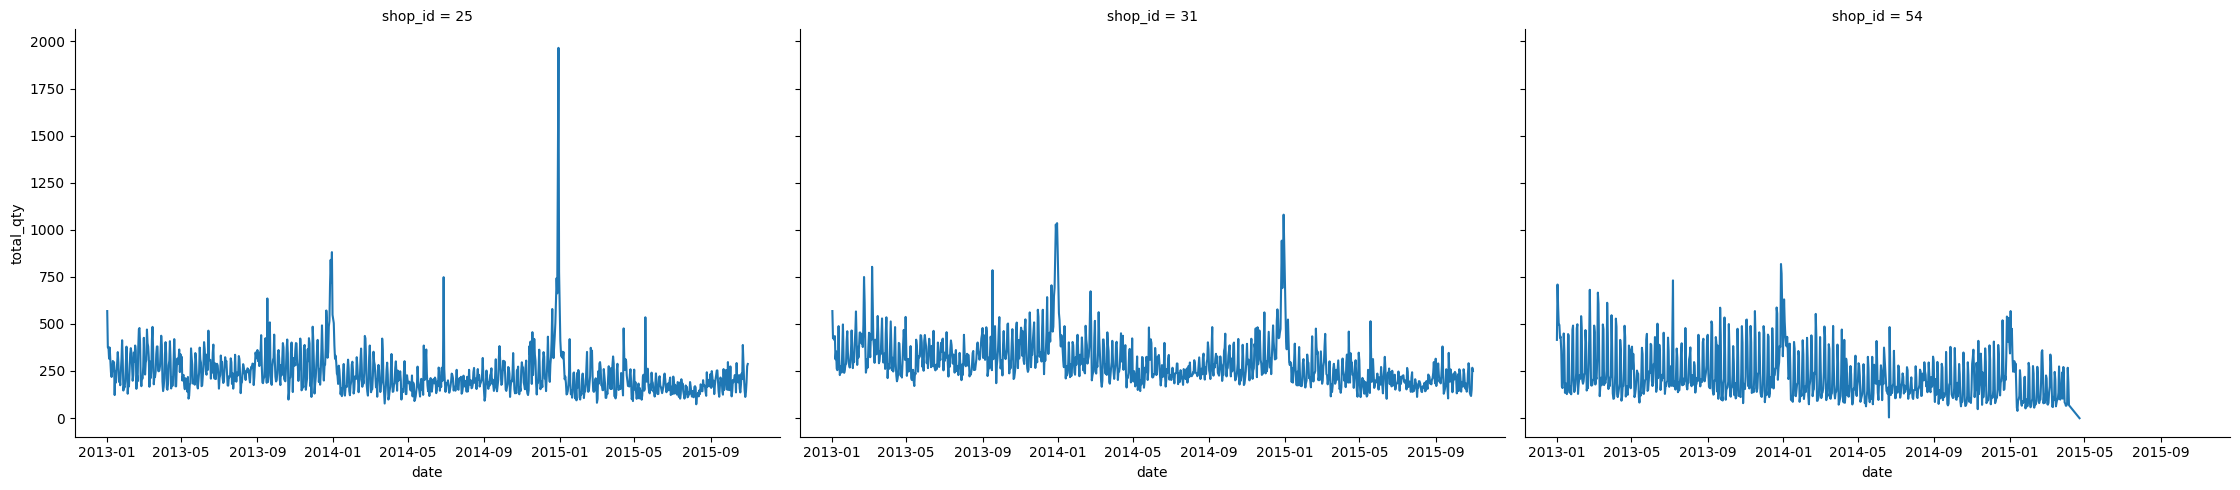

In [14]:
sns.relplot(data=daily_sales, kind='line',
            x='date', y='total_qty', col='shop_id', aspect=1.5)
plt.show()

Based on the multiple time series visualization of the top 3 shops, namely `shop_id` 25, 31, and 54 above, we can observe that the `total_qty` fluctuation is significantly different for each shop. Specifically, `shop_id` 25 and 31 experience extreme spikes at the end of each year, while `shop_id` 54 does not have any significant spikes. We chose to focus on `shop_id` 31 due to its high potential for improvement in terms of sales performance.

### Multivariate Time Series

In our case, multivariate time series is when we observed the fluctuation of `total_qty` and `total_revenue` over time, from only `shop_id` 31. Notice that we perform conditional subsetting on `daily_sales` to produce `daily_sales_31`.

In [15]:
daily_sales_31 = daily_sales[daily_sales['shop_id'] == 31].reset_index(drop=True)

Create visualization :

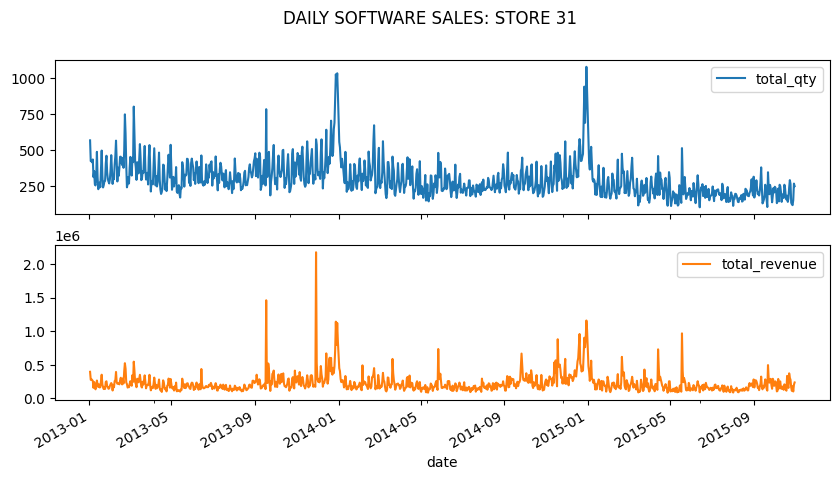

In [16]:
daily_sales_31.set_index('date')[['total_qty', 'total_revenue']].plot(subplots=True,figsize=(10, 5))
plt.suptitle('DAILY SOFTWARE SALES: STORE 31')
plt.show()

In [17]:
daily_sales_31.head()

date  shop_id  total_qty       total_revenue
0 2013-01-02       31      568.0 396,376.09999999497
1 2013-01-03       31      423.0          276,933.11
2 2013-01-04       31      431.0           286,408.0
3 2013-01-05       31      415.0    273,244.99999999
4 2013-01-06       31      435.0           260,775.0

From the visualization we can conclude that the fluctuation of `total_qty` and `total_revenue` is quite similar for `shop_id` 31. In fact, from the business perspective, variable quantity and revenue are closely related to each other. When the `total_qty` sold increases, logically, the `total_revenue` will also increases.

## Modeling using `prophet`

Time series forecasting is an essential component of data analysis, and it has become more critical in recent years as businesses rely on data to make informed decisions. The ability to predict future trends is essential for various industries, including finance, healthcare, and e-commerce. However, analyzing time series data can be challenging, as it involves decomposing the underlying components into trend, seasonality, and residuals.

The ability to predict future trends and patterns is crucial in many business domains, particularly in retail. Accurate sales forecasting allows retailers to optimize inventory levels, improve pricing strategies, and ultimately increase revenue. However, sales forecasting can be challenging due to the complex and dynamic nature of consumer behavior.

One of the recent advancements in time series forecasting is the **General Additive Model (GAM)**, which describes time series as a summation of its components. The three primary components of GAM are trend, seasonality, and residuals, which help to model the patterns and irregularities of the time series. As a starter, we will define time series with 3 different components:

- Trend ($T$): Long term movement in its mean
- Seasonality ($S$): Repeated seasonal effects
- Residuals ($E$): Irregular components or random fluctuations not described by trend and seasonality

The idea of GAM is that each of them is added to describe our time series:

$Y(t) = T(t) + S(t) + E(t)$

**Facebook** developed Prophet, an open-source tool that leverages GAM to make time series forecasting more accessible to non-experts. Prophet builds upon the traditional trend and seasonality components and adds a holiday effect to model irregular schedules, such as holidays. 

**Prophet**'s straightforward approach allows users to input their data and generate forecasts with minimal coding knowledge. It also includes robust model diagnostics and visualization tools, making it easy to identify issues and adjust the model as necessary.

**Prophet** has been proven to be useful in various industries, including retail, finance, and transportation. The tool's ability to model the irregular schedules of holidays and other events has made it a popular choice for businesses that rely on accurate forecasting to make decisions. Additionally, Prophet's flexibility and ease of use make it an attractive option for businesses of all sizes, from small startups to large corporations.

In conclusion, Prophet is an innovative tool that leverages GAM to make time series forecasting more accessible and user-friendly. Its ability to model trend, seasonality, and holiday effects has made it a popular choice among businesses that require accurate forecasting to make informed decisions.

To get started with Prophet, users can refer to the [official documentation](https://facebook.github.io/prophet/docs/quick_start.html) provided by Facebook. The documentation provides a comprehensive guide on how to install and use Prophet, including examples and best practices for time series forecasting. The documentation also includes information on how to fine-tune the model parameters and how to incorporate external regressors, such as holiday effects or other time series data, into the forecasting model. Users can access the documentation online or download it as a PDF file.

### Baseline Model

#### Prepare the data

To use the `prophet` package, we first need to prepare our time series data into a specific format data frame required by the package. The data frame requires 2 columns:

- `ds`: the time stamp column, stored in `datetime64` data type
- `y`: the value to be forecasted

In this example, we will be using the `total_qty` as the value to be forecasted.

In [18]:
daily_total_qty = daily_sales_31[['date', 'total_qty']].rename(
    columns={'date': 'ds',
             'total_qty': 'y'})

daily_total_qty.head()

ds     y
0 2013-01-02 568.0
1 2013-01-03 423.0
2 2013-01-04 431.0
3 2013-01-05 415.0
4 2013-01-06 435.0

The data (`daily_total_qty`) represents the daily sales of a shop with `shop_id` 31 from  January 2013. Each row in the table represents one day's sales, with the date of the sales recorded in the first column. The second column shows the total quantity (changed into `y`) of items sold by the shop on that day. For example, on January 2nd, 2013, the shop sold 568 items. The data is organized in a tabular format, with each row representing a different day and the sales data for that day in the corresponding columns.

The format of data as shown in the example (date/time and a corresponding value) is a standard format for time series analysis and forecasting. This format is necessary because time series data has a temporal dimension, which means that each data point is associated with a specific date/time. In order to capture the underlying patterns and trends in the data, it is important to maintain the temporal information.

**Additionally**, most time series analysis and forecasting methods require the data to be in a specific format. For example, Prophet, a popular time series forecasting tool, requires the data to be in a dataframe with two columns: 

- `ds` (date or datetime) and 
- `y` (numeric value)

Therefore, it is important to have time series data in a format that is compatible with the analysis and forecasting tools being used, and the standard format of date/time and corresponding value is a widely accepted and compatible format. With our data in this format, we can proceed to the next step of the analysis which is fitting the data to a model.

#### Fitting Model

The fitting model step involves training the forecasting model on the historical data. In this case, we will use the Prophet library in Python to fit the time series data. 

First, we will initiate a `prophet` object using `Prophet()` and add our time series data (`daily_total_qty`) to it. Then, we will call the `.fit()` method on the object to fit the model on the historical data. During the fitting process, the Prophet model will identify the trends, seasonality, and any other patterns in the data. 

In [19]:
# load the library
# %pip install prophet

from prophet import Prophet
import cmdstanpy

In [20]:
# fit model
model_31 = Prophet()
model_31.fit(daily_total_qty)

12:19:17 - cmdstanpy - INFO - Chain [1] start processing
12:19:17 - cmdstanpy - INFO - Chain [1] done processing


The code is fitting the time series data stored in the `daily_total_qty` DataFrame to a Prophet model object named `model_31`. The Prophet model is initialized without any arguments, so it uses the default settings. The `fit` method is then called on the model object with the time series data as its argument to train the model on the historical data. After fitting the model, the resulting trained model is stored in `model_31`. This trained model can then be used to make predictions for future time periods.

#### Forecasting

Based on the existing data, we'd like to perform a forecasting for **1 years into the future**. To do that, we will need to first prepare a data frame that consist of the future time stamp range we'd like to forecast. Luckily, `prophet` has provided `.make_future_dataframe()` method that help us to prepare the data:

In [21]:
future_31 = model_31.make_future_dataframe(periods=365, freq='D')
future_31.tail()

ds
1391 2016-10-26
1392 2016-10-27
1393 2016-10-28
1394 2016-10-29
1395 2016-10-30

Now we have acquired a new `future_31` data frame that consist of a date span of **the beginning of a time series to 365 days into the future**. We will then use this data frame is to perform the forecasting by using `.predict()` method of our `model_31`:

In [22]:
forecast_31 = model_31.predict(future_31)

Perform top 5 observation from `forecast_31`:

In [23]:
## code here
forecast_31.head()

ds              trend        yhat_lower        yhat_upper  \
0 2013-01-02          376.05492 487.6481467261633 668.3137694607668   
1 2013-01-03 375.98310575581394 473.8314952722316 657.1404457017524   
2 2013-01-04 375.91129151162784  534.154276556729 717.2190205219829   
3 2013-01-05 375.83947726744185 538.7458514422061  724.446349862557   
4 2013-01-06  375.7676630232558 432.8588690198542 613.4373920843301   

         trend_lower        trend_upper     additive_terms  \
0          376.05492          376.05492 201.80161965989728   
1 375.98310575581394 375.98310575581394 189.04461844427846   
2 375.91129151162784 375.91129151162784 249.63266875609227   
3 375.83947726744185 375.83947726744185    253.64780707471   
4  375.7676630232558  375.7676630232558 145.96360475566536   

   additive_terms_lower  additive_terms_upper              weekly  \
0    201.80161965989728    201.80161965989728  -32.83351510170612   
1    189.04461844427846    189.04461844427846 -26.061933600004384   
2    249.63266875609227    249.63266875609227   55.63783098197405   
3       253.64780707471       253.64780707471   82.00406013906924   
4    145.96360475566536    145.96360475566536 -2.4515164422926277   

         weekly_lower        weekly_upper             yearly  \
0  -32.83351510170612  -32.83351510170612 234.63513476160338   
1 -26.061933600004384 -26.061933600004384  215.1065520442828   
2   55.63783098197405   55.63783098197405 193.99483777411825   
3   82.00406013906924   82.00406013906924 171.64374693564073   
4 -2.4515164422926277 -2.4515164422926277 148.41512119795797   

        yearly_lower       yearly_upper  multiplicative_terms  \
0 234.63513476160338 234.63513476160338                   0.0   
1  215.1065520442828  215.1065520442828                   0.0   
2 193.99483777411825 193.99483777411825                   0.0   
3 171.64374693564073 171.64374693564073                   0.0   
4 148.41512119795797 148.41512119795797                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper              yhat  
0                         0.0                         0.0 577.8565396598973  
1                         0.0                         0.0 565.0277242000924  
2                         0.0                         0.0 625.5439602677201  
3                         0.0                         0.0 629.4872843421518  
4                         0.0                         0.0 521.7312677789212

The output will generate a DataFrame with the following columns:

- `ds`: the date values in the future that we have specified in the `future_31` DataFrame
- `yhat`: the forecasted values for the `y` column
- `yhat_lower`: the lower bound of the forecasted values
- `yhat_upper`: the upper bound of the forecasted values


- `trend`: the trend component of the forecasted values
- `trend_lower`: the lower bound of the trend
- `trend_upper`: the upper bound of the trend


- `weekly`: the weekly component of the forecasted values
- `weekly_lower`: the lower bound of the weekly component of the forecasted values
- `weekly_upper`: the upper bound of the weekly component of the forecasted values


- `yearly`: the yearly component of the forecasted values
- `yearly_lower`: the lower bound of the yearly component of the forecasted values
- `yearly_upper`: the upper bound of the yearly component of the forecasted values

- `additive_terms`: the additive component of the forecasted values
- `additive_terms_lower`: the lower bound of the additive component of the forecasted values
- `additive_terms_upper`: the upper bound of the additive component of the forecasted values

- `multiplicative_terms`: the multiplicative component of the forecasted values
- `multiplicative_terms_lower`: the lower bound of the multiplicative component of the forecasted values
- `multiplicative_terms_upper`: the upper bound of the multiplicative component of the forecasted values


Select several information from forecasting result:

In [24]:
forecast_31[['ds', 'trend', 'weekly', 'yearly', 'yhat']].head()

ds              trend              weekly             yearly  \
0 2013-01-02          376.05492  -32.83351510170612 234.63513476160338   
1 2013-01-03 375.98310575581394 -26.061933600004384  215.1065520442828   
2 2013-01-04 375.91129151162784   55.63783098197405 193.99483777411825   
3 2013-01-05 375.83947726744185   82.00406013906924 171.64374693564073   
4 2013-01-06  375.7676630232558 -2.4515164422926277 148.41512119795797   

               yhat  
0 577.8565396598973  
1 565.0277242000924  
2 625.5439602677201  
3 629.4872843421518  
4 521.7312677789212

Recall that in General Additive Model, we use time series components and perform a summation of all components. In this case, we can see that the model is extracting 3 types of components: `trend`, `weekly` seasonality, and `yearly` seasonality. Means, in forecasting future values it will use the following formula:

$yhat(t) = T(t) + S_{weekly}(t) + S_{yearly}(t)$

We can manually confirm from `forecast_31` that the column `yhat` = `trend` + `weekly` + `yearly`.

In [25]:
forecast_31['trend'] + forecast_31['weekly'] + forecast_31['yearly']

0       577.8565396598973
1       565.0277242000923
2       625.5439602677202
3       629.4872843421518
4       521.7312677789212
              ...        
1391    88.16023114695601
1392    96.71165237742389
1393   181.11546501909677
1394   211.09941178448472
1395   131.13901746136014
Length: 1396, dtype: float64

In [26]:
forecast_31['yhat']

0       577.8565396598973
1       565.0277242000924
2       625.5439602677201
3       629.4872843421518
4       521.7312677789212
              ...        
1391    88.16023114695601
1392    96.71165237742389
1393   181.11546501909675
1394   211.09941178448472
1395   131.13901746136014
Name: yhat, Length: 1396, dtype: float64

#### Visualize

Now, observe how `.plot()` method take our model_31, and newly created forecast_31 object to create a `matplotlib` object that shows the forecasting result. The black points in the plot shows the **actual** time series, and the blue line shows the **fitted** time series along with its forecasted values 365 days into the future.

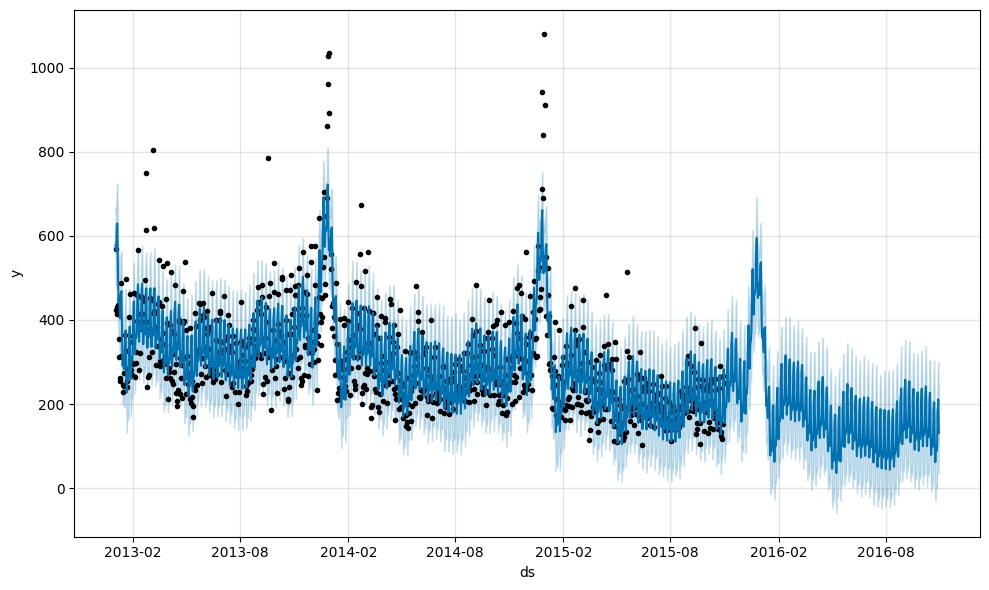

In [27]:
fig = model_31.plot(forecast_31)

We can also visualize each of the trend and seasonality components using `.plot_components` method.

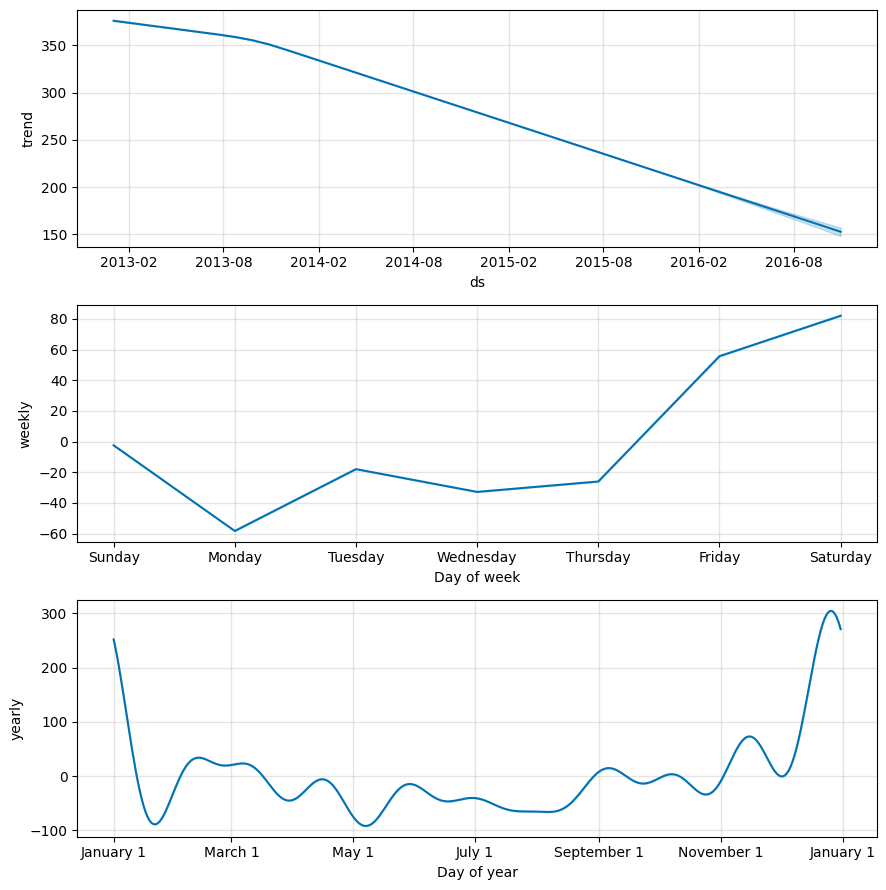

In [28]:
fig = model_31.plot_components(forecast_31)

From the visualization above, we can get insights such as:

- The trend shows that the `total_qty` sold is decreasing from time to time.
- The weekly seasonality shows that sales on weekends are higher than weekdays.
- The yearly seasonality shows that sales peaked at the end of the year.

#### [Optional] Interactive Visualization

An interactive figure of the forecast and components can be created with `plotly`. You will need to install `plotly` 4.0 or above separately, as it will not by default be installed with `prophet`. You will also need to install the `notebook` and `ipywidgets` packages

In [29]:
import plotly.io as pio
# notebook
pio.renderers.default = 'notebook'

In [30]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model_31, forecast_31)

In [31]:
plot_components_plotly(model_31, forecast_31)

With interactive visualization using Plotly, we can get more detailed and specific information compared to a normal static visualization. By hovering the cursor over the plots, we can get the exact numerical values of each data point. Additionally, we can zoom in and out of the plots to better focus on specific areas of interest.

The interactive visualization also allows us to switch on or off different components of the time series, such as trend, seasonality, and holidays. This feature enables us to better understand the influence of each component on the overall time series.

In general, interactive visualization can help us to better explore and understand complex time series data, as we can dynamically interact with the data and customize the visualization based on our needs. This type of visualization is especially useful for presenting findings and insights to stakeholders who may not be familiar with the data, as it allows them to interact with and explore the data in a more intuitive and engaging way.

### Trend Component

The trend components of our model, as plotted using `.plot_components()` method is producing a decreasing trend over the year. Trend is defined as a long term movement of average over the year. The methods that is implemented by Prophet is by default a **linear model** as shown below:

![trend_component.png](assets/trend_component.png)

The trend component in a time series analysis shows the long-term movement in the data. From the visualization above, we can see the trend component of the sales data over time for shop_id 31. We can observe if the trend is increasing, decreasing, or staying constant. 

If the trend is increasing, it indicates that there is a growing demand for the product, which can lead to business recommendations such as increasing inventory, expanding the product line, or increasing marketing efforts. On the other hand, if the trend is decreasing, it may be an indication to reduce inventory or discontinue the product.

If we observe a decreasing trend in sales, it may indicate that the product or service is losing its popularity among customers. Here are some potential *business recommendations*:

1. **Evaluate the product mix**: If the trend is caused by a decline in sales for a specific product or category, it may be worth reevaluating the product mix to identify areas for improvement. The business could consider phasing out poorly performing products and introducing new products that are in higher demand.

2. **Revisit pricing strategy**: If the trend is caused by increasing competition or pricing pressure, it may be worth reevaluating the pricing strategy to identify opportunities for cost reductions or price adjustments. The business could consider reducing prices for underperforming products or services or increasing prices for high-demand products.

3. **Focus on customer retention**: If the trend is caused by declining customer loyalty or satisfaction, it may be worth focusing on improving customer experience and retention. The business could consider investing in customer service training, loyalty programs, or other initiatives to improve customer satisfaction and loyalty.

4. **Increase marketing efforts**: If the trend is caused by declining brand awareness or visibility, it may be worth increasing marketing efforts to improve brand visibility and attract new customers. The business could consider investing in advertising campaigns, social media marketing, or other promotional initiatives to increase brand awareness and reach new customers.

Overall, the specific recommendations will depend on the root cause of the trend and the nature of the business. It is important to conduct a thorough analysis to identify the underlying factors and develop targeted strategies to address them.

**[OPTIONAL] - Mathematics Behind Trend**

The linear model will take a straight line across the x axis using the ordinary least square method, means it tries to produce the least difference between the line and the actual demand value resulting in the long-term “average” value given a time point t accross the date. Linear model or linear regression is a common statistical tool to model a numerical value. The formula of a linear regression is as follow:

$$y=mx+C$$

In our time series context, where we try to model our trend component, y equals to the Trend, m equals the difference for every change of time point and C for the intercept. In a more specific manner we could say that:

$$T(date)=m(date)+C$$

To illustrate the slope part of our trend which is an important part in understanding the trend, we can create the model using `ols()` function from `statsmodels` library like follow:

In [32]:
# import the library
import statsmodels.api as sm

# define predictor and target variable
daily_sales_31_copy = daily_sales_31.copy()
daily_sales_31_copy['date_ordinal'] = daily_sales_31_copy['date'].apply(lambda date: date.toordinal())

X = daily_sales_31_copy['date_ordinal']
y = daily_sales_31_copy['total_qty']

# build ols model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y, X_train_sm).fit()

# printing the parameters
lr.params

const          124,413.73330199216
date_ordinal   -0.1687716528432594
dtype: float64

The coefficients of this model will be translated into:

$$demand.in.qty=−0.17date+124413.733$$

The first one is our slope or m, which is calculated to be -0.17, so every increase of 1 unit of date, (in this case daily), the demand value decreases by 0.17. This shows a negative relationship between dates and demand and lead us to believe that there is indeed a downward trend for our demand time series. 

#### Automatic Changepoint Detection

In time series analysis, changepoints represent points in the data where the underlying trend or pattern changes. It is important to identify changepoints because they can have significant impacts on forecasting accuracy. Prophet implements a changepoint detection algorithm which helps to automatically identify the points where the slope of the trend changes. 

Automatic changepoint detection in Prophet can be a useful tool for data analysts and forecasters who want to build accurate and robust models of time-series data, without having to manually specify or identify changepoints.

By default, Prophet sets 25 potential changepoints (`n_changepoints=25`) which are uniformly placed on the first 80% of the time series (`changepoint_range=0.8`). This means that Prophet will look for up to 25 possible changepoints within the first 80% of the data to help identify where the trend may have changed. 

Adjusting the number of potential changepoints and the range where they are searched can affect the model's ability to capture trend changes in the data. Too few potential changepoints may cause the model to miss important changes, while too many potential changepoints may overfit the data and create too many small segments. Therefore, it's important to adjust these parameters appropriately to achieve the best model fit and forecasting accuracy.

**How Automatic Changepoint Works**

The automatic changepoint detection feature in Prophet works by searching for points in the time-series data where the underlying structure changes. These changes can manifest as shifts in trends, seasonality, or other patterns in the data. The algorithm in Prophet identifies these changepoints by fitting piecewise linear regressions to the data, where each piece corresponds to a different segment of the time-series with a distinct structure.

The algorithm first starts with an initial set of potential changepoints and then fits the piecewise linear regressions to the data, using a Markov chain Monte Carlo (MCMC) sampling approach to estimate the posterior distribution of the model parameters. The algorithm then evaluates the goodness-of-fit of the model using various metrics, such as the Bayesian information criterion (BIC), and determines whether a new changepoint should be added or an existing one should be removed.

This process continues iteratively until the algorithm finds the set of changepoints that provides the best fit to the data. The resulting changepoints can then be used to adjust the model accordingly, such as by incorporating additional terms to account for changes in the underlying structure of the data over time.

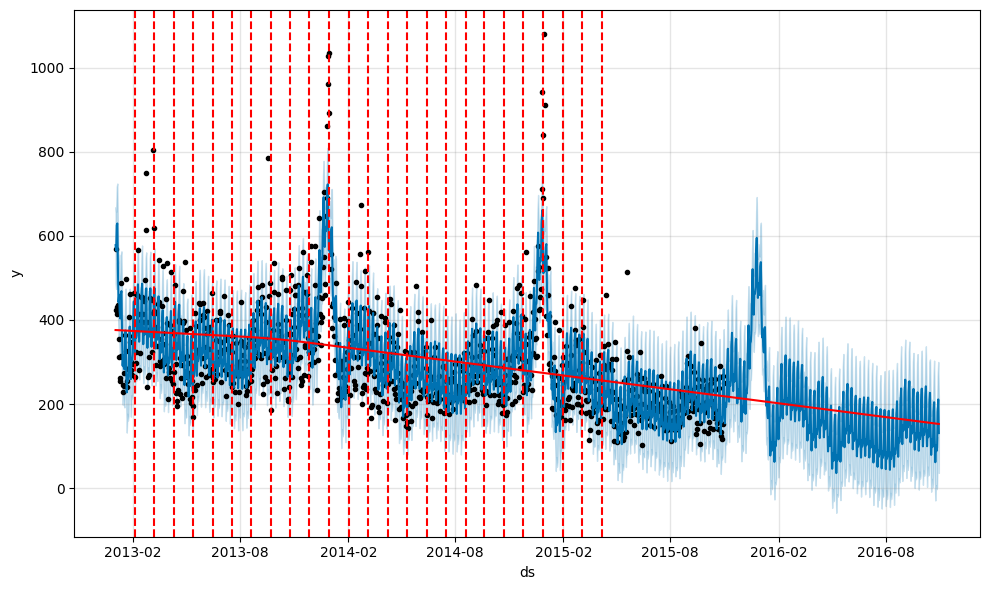

In [33]:
# for illustration purposes only, threshold = 0
from prophet.plot import add_changepoints_to_plot
fig = model_31.plot(forecast_31)
a = add_changepoints_to_plot(fig.gca(), model_31, forecast_31, threshold=0)

From the 25 potential changepoints, it will then calculate the magnitude of the slope change rate and decided the **significant** change rate. The model detected **3 significant changepoints** and separate the series into **4 different trend slopes**.

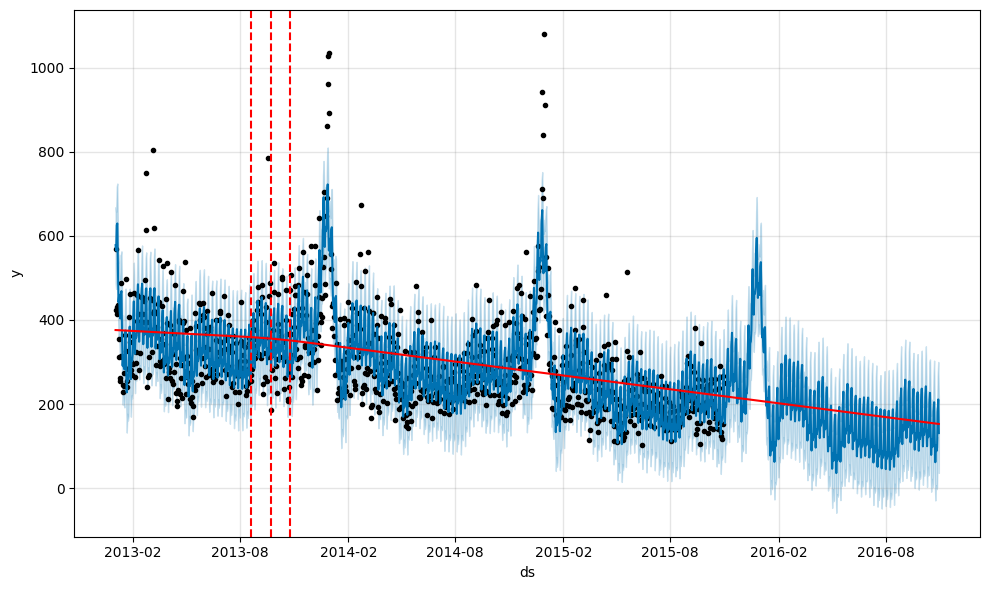

In [34]:
fig = model_31.plot(forecast_31)
a = add_changepoints_to_plot(fig.gca(), model_31, forecast_31)

#### Adjusting Trend Flexibility

There are some parameters that we can use to adjust changepoint thus increase the flexibility of our trend. The parameter recommended to be tuned is:

- `changepoint_prior_scale` (default = 0.05): The flexibility of the trend, and in particular how much the trend changes at the trend changepoints. Recommended range: [0.001, 0.5]

💡 Increasing the default value of the parameter above will give extra flexibility to the trend line (overfitting the training data). On the other hand, decreasing the value will cause the trend to be less flexible (underfitting).

In [35]:
daily_total_qty.head() 

ds     y
0 2013-01-02 568.0
1 2013-01-03 423.0
2 2013-01-04 431.0
3 2013-01-05 415.0
4 2013-01-06 435.0

12:19:25 - cmdstanpy - INFO - Chain [1] start processing
12:19:26 - cmdstanpy - INFO - Chain [1] done processing


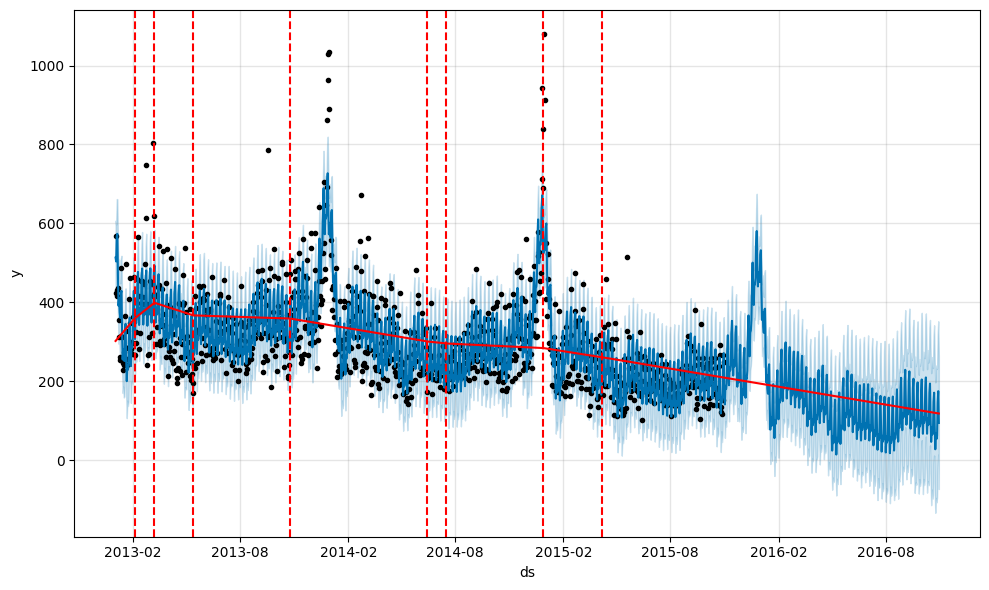

In [36]:
# fitting model
model_tuning_trend = Prophet(
    changepoint_prior_scale=0.5 # default = 0.05
    )
model_tuning_trend.fit(daily_total_qty)

# forecasting
future = model_tuning_trend.make_future_dataframe(periods=365, freq='D')
forecast = model_tuning_trend.predict(future)

# visualize
fig = model_tuning_trend.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model_tuning_trend, forecast)

Tuning the changepoint range and prior scale hyperparameters in the model can have a significant impact on the model's predictions. 

Setting the `changepoint_prior_scale` to 0.5, which is larger than the default value of 0.05, means that the model will be more flexible in detecting changepoints. This may help the model capture more complex patterns in the data, but it may also lead to overfitting.

Other than the one above, there are also other parameters provided:
- `changepoint_range` (default = 0.8): Proportion of the history in which the trend is allowed to change. Setting this parameter to 0.8 means that the changepoints will be distributed over the first 80% of the time series. **Not often tuned**. Can be tuned according to the data pattern, if newer data have similar pattern as older data, a number of 0.8 to 0.95 can be used.
- `n_changepoints` (default = 25): The number of first potential changepoints, **not recommended to be tuned**. This is better tuned by adjusting the regularization (`changepoint_prior_scale`)

While the `n_changepoints` is not recommended to be tuned, there are certain conditions which can make us change the value. If our dataset consists of a small number of observations, such as 5 years of monthly data (resulting in a total of only 60 data points), it becomes necessary to reduce the value of `n_changepoints`.

The chosen number should be sufficiently low to ensure that fragments of our dataset between changepoints effectively capture the underlying trend. For instance, if we observe a discernible trend in our data over the course of a year, setting the `n_changepoints` parameter to 4 or 5 may be appropriate. It’s important to note that this is just a rough example and the optimal value may vary depending on the specific characteristics of the dataset.

After tuning the model with these hyperparameters, we can expect to see different trend components in the visualization, as well as potentially different forecasts. The model may also perform better or worse on new data, depending on the nature of the time series and the quality of the tuning.

### Seasonality Component

Let’s talk about other time series component, seasonality. Seasonality in time series refers to a pattern that repeats at regular intervals, such as **weekly, monthly**, or **yearly**. It is a predictable variation in the data that can be due to a number of factors, such as weather, holidays, and other cyclical events.

Checking the seasonality component in a time series analysis is important because it can help identify these patterns and allow for better forecasting. By understanding the seasonal patterns in the data, we can develop a more accurate forecast for future periods. In addition, identifying seasonal patterns can help us understand the underlying factors that influence the data and make more informed decisions. For example, if we observe a seasonal increase in sales during the holiday season, we may want to adjust our inventory or marketing strategies accordingly. 

Let's review from the following plot components:

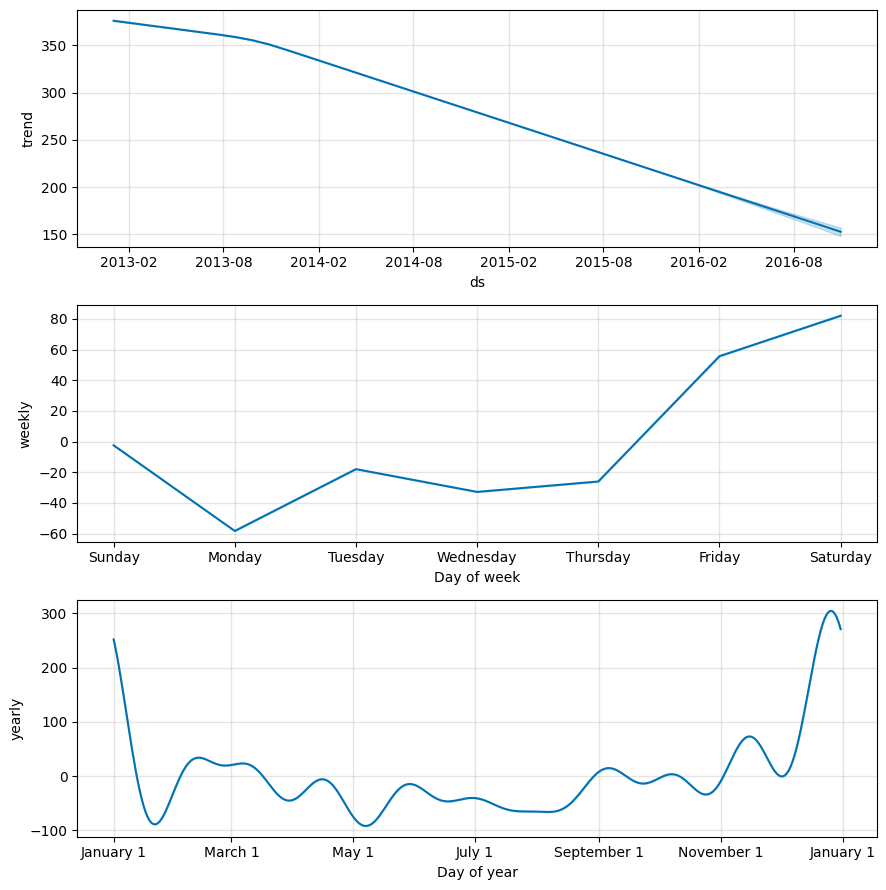

In [37]:
fig = model_31.plot_components(forecast_31)

The `model_31.plot_components(forecast_31)` function generates a visualization of the individual components of the time series: **trend**, **weekly seasonality**, and **yearly seasonality**.

- The **trend** component shows the overall direction of the time series. 
- The **weekly seasonality** component shows the patterns that repeat on a weekly basis. 
- The **yearly seasonality** component shows the patterns that repeat on a yearly basis.

By default, Prophet will try to determine existing seasonality based on existing data provided. In our case, the data provided is a **daily** data from early 2013 to end 2015.

- Any daily sampled data by default will be detected to have a **weekly seasonality**.
- While **yearly seasonality**, by default will be set as `True` if the provided data has more than 2 years of daily sample.
- The other regular seasonality is a **daily seasonality** which tries to model an hourly pattern of a time series. Since our data does not accommodate hourly data, by default the daily seasonality will be set as `False`.

By examining the seasonality components, we can gain insights into the periodic patterns that occur in the data. *For example*, we can identify which months or days of the week have higher or lower sales, and use this information to make informed business decisions. We can also identify whether the patterns are changing over time, which can help us adjust our strategies accordingly.

In the visualization, each component is shown separately, with the actual data points overlaid on top of the predicted values. This allows us to see how well the model is capturing the patterns in the data.


#### Fourier Order

Prophet uses a Fourier series to approximate the seasonality effect. It is a way of approximating a periodic function as a (possibly infinite) **sum of sine and cosine** functions. 

💡 The number of terms in the partial sum (the order) is a parameter that determines how quickly the seasonality can change. Increasing the fourier order will give extra flexibility to the seasonality (overfitting the training data), and vice versa.

Here is an interactive introduction to Fourier: http://www.jezzamon.com/fourier/

12:19:29 - cmdstanpy - INFO - Chain [1] start processing
12:19:29 - cmdstanpy - INFO - Chain [1] done processing


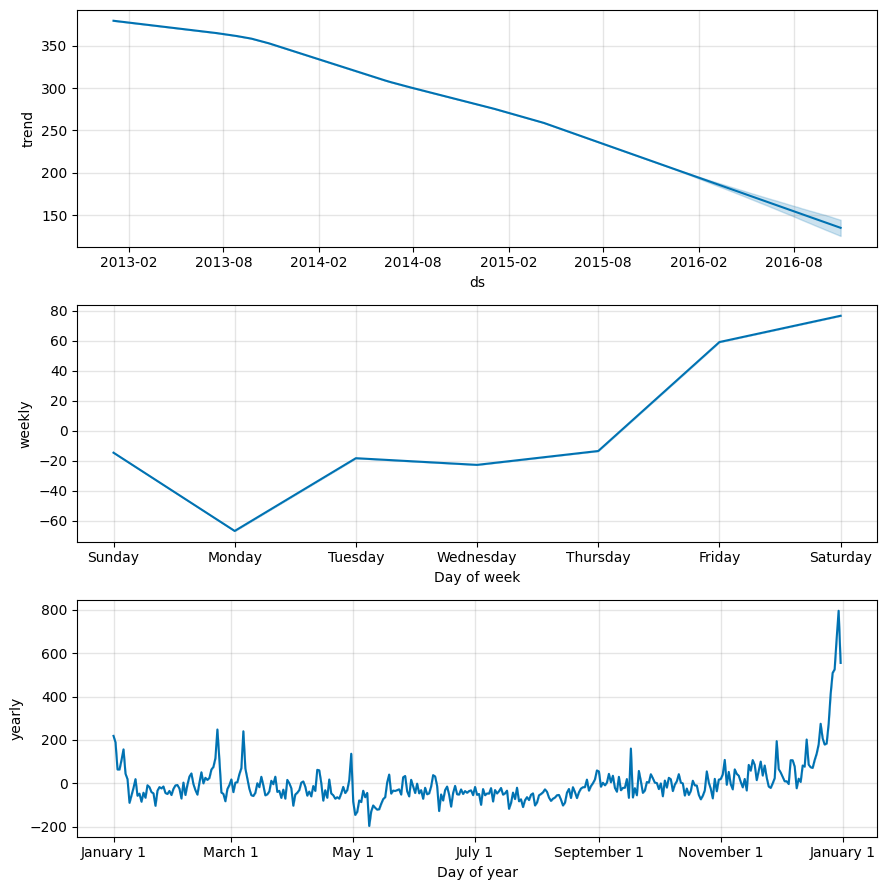

In [38]:
# fitting model
model_tuning_seasonality = Prophet(
    weekly_seasonality=3, # default = 3
    yearly_seasonality=200 # default = 10
    )
model_tuning_seasonality.fit(daily_total_qty)

# forecasting
future = model_tuning_seasonality.make_future_dataframe(periods=365, freq='D')
forecast = model_tuning_seasonality.predict(future)

# visualize
fig = model_tuning_seasonality.plot_components(forecast)

#### Custom Seasonalities

The default provided seasonality modelled by Prophet for a daily sampled data is: weekly and yearly. 

Consider this case: a sales in your business is heavily affected by payday. Most customers tends to buy your product based on the day of the month. Since it did not follow the default seasonality of yearly and weekly, we will need to define a non-regular seasonality. There are two steps we have to do:
1. Remove default seasonality (eg: remove yearly seasonality) by setting `False`
2. Add seasonality (eg: add monthly seasonality) by using `.add_seasonality()` method before fitting the model

We ended up with formula:
$yhat(t) = T(t) + S_{weekly}(t) + \bf{S_{monthly}(t)}$

12:19:31 - cmdstanpy - INFO - Chain [1] start processing
12:19:31 - cmdstanpy - INFO - Chain [1] done processing


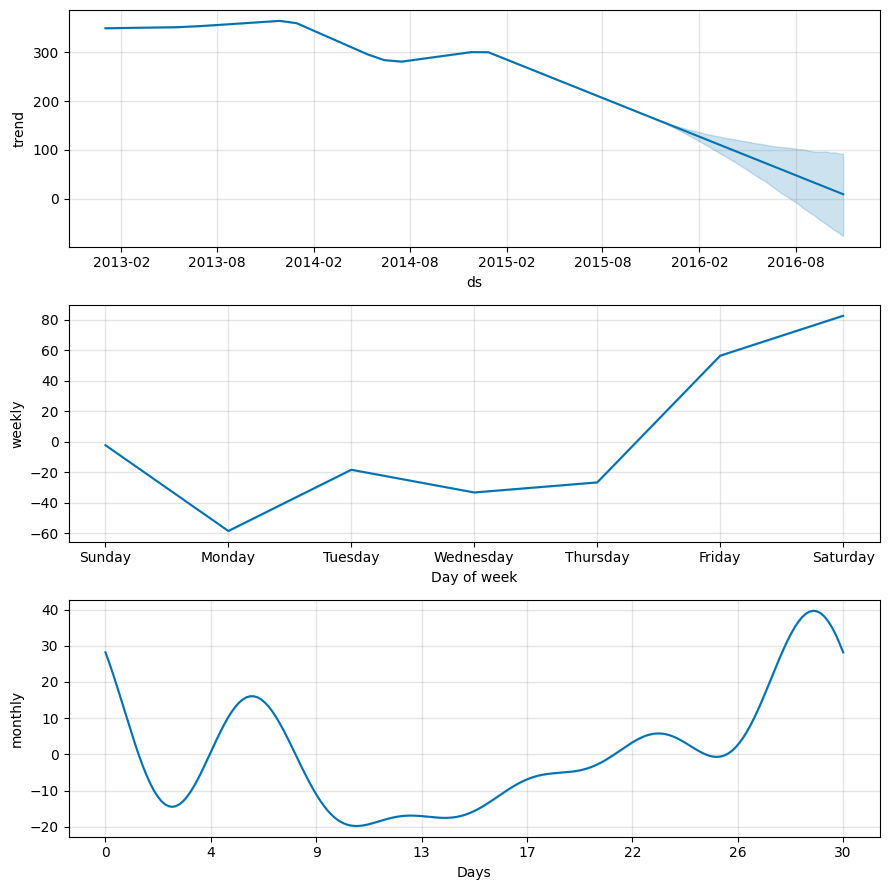

In [39]:
# fitting model
model_custom_seasonality = Prophet(
    yearly_seasonality=False ## remove seasonality
    )
## add seasonality
model_custom_seasonality.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_custom_seasonality.fit(daily_total_qty)

# forecasting
future = model_custom_seasonality.make_future_dataframe(periods=365, freq='D')
forecast = model_custom_seasonality.predict(future)

# visualize
fig = model_custom_seasonality.plot_components(forecast)

For monthly seasonality, we provided period = 30.5 indicating that there will be non-regular 30.5 frequency in one season of the data. The 30.5 is a common frequency quantifier for monthly seasonality, since there are some months with a total of 30 and 31 (some are 28 or 29).

💡 Recommended Fourier order according to the seasonality:
- weekly seasonality = 3
- monthly seasonality = 5
- yearly seasonality = 10

### [Holiday Effects](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#modeling-holidays-and-special-events)

Prophet offers the benefit of incorporating a holiday effect into the time series model. The holiday effect refers to non-regular events that may have a significant impact on the time series, such as **national holidays**, **major sporting events**, or **sales promotions**. 

Unlike regular seasonality patterns that are often automatically detected, the holiday effect needs to be **manually** specified by the user. By including the holiday effect in the model, Prophet can provide more **accurate** forecasts and **better capture** the effects of these important events on the time series.

#### Modeling Holidays and Special Events

Now let’s take a better look for our data. We could see that **every end of a year**, there is a significant increase of sales which exceeds 800 sales a day.

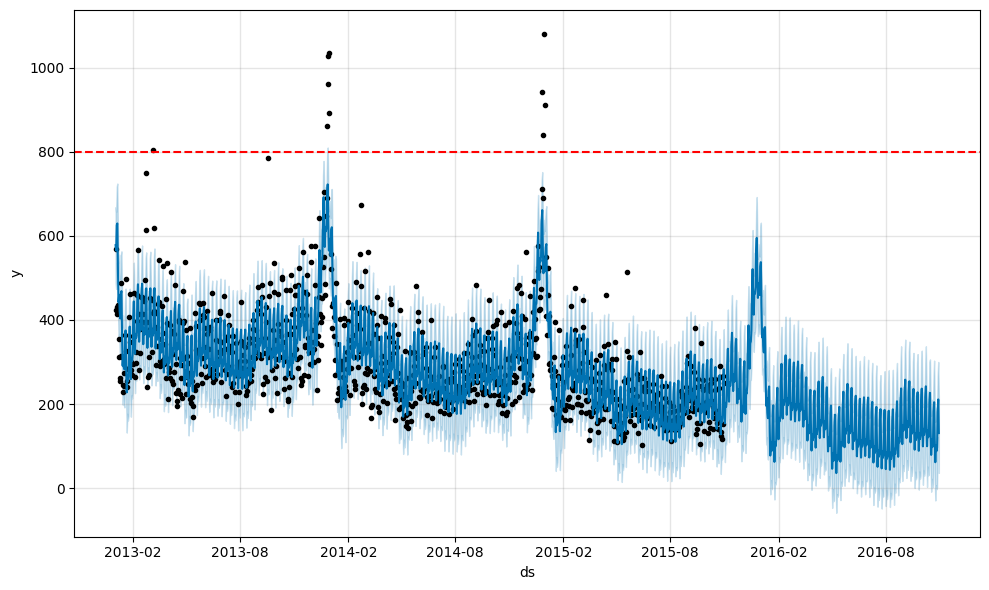

In [40]:
# for illustration purposes only
fig = model_31.plot(forecast_31)
plt.axhline(y=800, color='red', ls='--')
plt.show()

Table below shows that the relatively large sales mostly happened at the very end of a year between **27th to 31st** December. Now let’s assume that this phenomenon is the result of the **new year eve** where most people spent the remaining budget of their Christmas or End year bonus to buy our goods.

In [41]:
daily_total_qty[daily_total_qty['y'] > 800]

ds       y
64  2013-03-07   803.0
359 2013-12-27   861.0
360 2013-12-28 1,028.0
361 2013-12-29   962.0
362 2013-12-30 1,035.0
363 2013-12-31   891.0
723 2014-12-27   942.0
725 2014-12-29   839.0
726 2014-12-30 1,080.0
727 2014-12-31   912.0

In Prophet, we can specify holidays by creating a dataframe that includes the **dates** and **names of the holidays**. The dataframe should have two columns: `holiday` and `ds`, where `holiday` contains the name of the holiday and `ds` contains the date. 

In addition we can add `lower_window` and `upper_window` parameters are used to expand the holiday effect to include a range of days around the holiday. By default, both parameters are set to 0, which means that only the exact holiday dates are included in the holiday effect. 

Whether to set the `lower_window` and `upper_window` parameters depends on the specific context of the analysis and the domain knowledge of the user. If there are reasons to believe that the holiday effect may extend beyond the exact holiday dates, it may be appropriate to increase the values of `lower_window` and `upper_window` to capture this effect. 

However, it's also possible that the holiday effect is only present on the exact holiday dates and not on surrounding days, in which case it's appropriate to leave both parameters at their default value of 0. Ultimately, the decision whether to set `lower_window` and `upper_window` should be made based on the specific characteristics of the time series being analyzed and the domain knowledge of the user.

In this case, we'll prepare a `holidays` data frame with the following column:

- `holiday`: the holiday unique name identifier
- `ds`: timestamp
- `lower_window`: how many time unit **behind** the holiday that is assumed to to be affected (smaller or equal than zero)
- `upper_window`: how many time unit **after** the holiday that is assumed to be affected (larger or equal to zero)

⚠️ It must include all occurrences of the holiday, both in the **past** (back as far as the historical data go) and in the **future** (out as far as the forecast is being made).

In [42]:
holidays = pd.DataFrame({
    'holiday': 'new_year_eve',
    'ds': pd.to_datetime(['2013-12-31', '2014-12-31', # past date, historical data 
                          '2015-12-31']), # future date, to be forecasted
    'lower_window': -4, # include 27th - 31st December
    'upper_window': 0})
holidays

holiday         ds  lower_window  upper_window
0  new_year_eve 2013-12-31            -4             0
1  new_year_eve 2014-12-31            -4             0
2  new_year_eve 2015-12-31            -4             0

Once we have prepared our `holidays` data frame, we can then pass this dataframe to the `holidays` parameter when creating a new Prophet instance. The model will then include the holiday effect in its forecast.

12:19:33 - cmdstanpy - INFO - Chain [1] start processing
12:19:33 - cmdstanpy - INFO - Chain [1] done processing


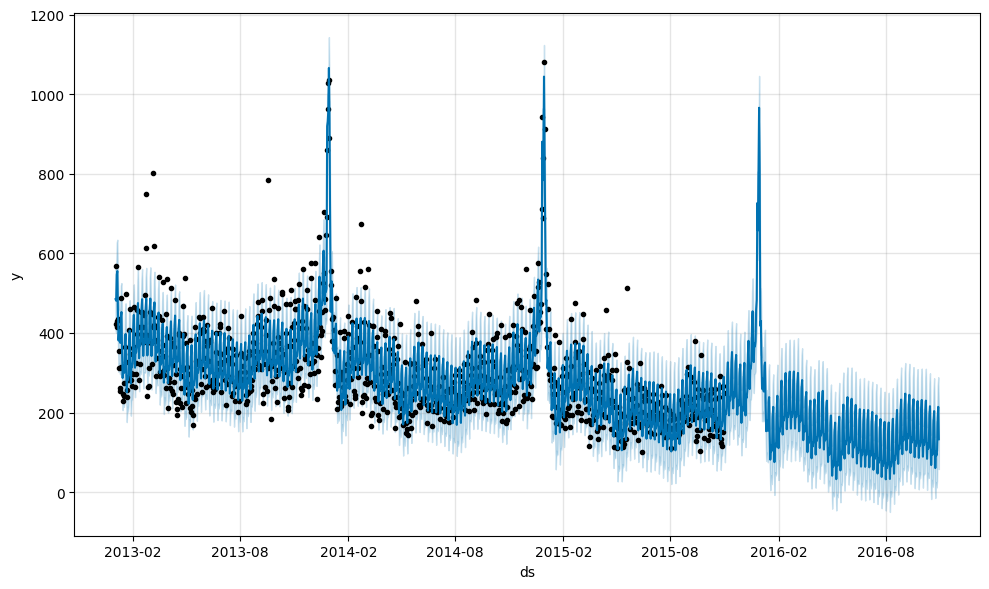

In [43]:
# fitting model
model_holiday = Prophet(holidays=holidays)
model_holiday.fit(daily_total_qty)

# forecasting
future = model_holiday.make_future_dataframe(periods=365, freq='D')
forecast = model_holiday.predict(future)

# visualize
fig = model_holiday.plot(forecast)

Observe how now it has more confidence in capturing the holiday effect on the end of the year instead of relying on the yearly seasonality effect. If we plot the components, we could also get the holiday components listed as one of the time series components:

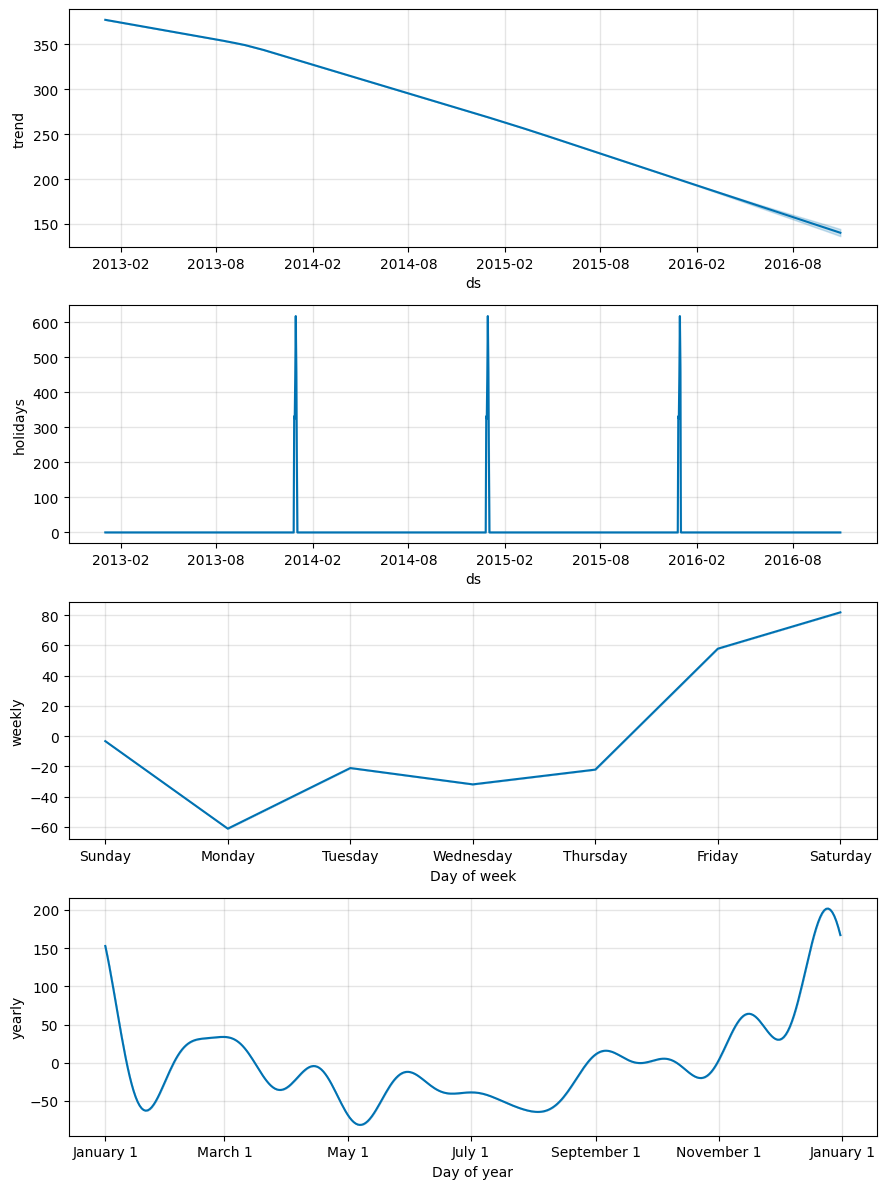

In [44]:
fig = model_holiday.plot_components(forecast)

#### [[OPTIONAL] Built-in Country Holidays](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#built-in-country-holidays)


Prophet has a **built-in** collection of country-specific holidays, which can be easily incorporated into the model using the `.add_country_holidays()` method. This feature is useful for modeling time series data that are impacted by country-specific holidays, such as **national holidays** or **cultural events**. 

Using built-in country holidays can significantly **improve** the accuracy of our model in predicting time series data that are influenced by such events, and can save us the time and effort of manually specifying these holidays ourselves.

For instance, we can use the `country_name` parameter to specify the country whose holidays we want to include in our model. For example, to include holidays for Indonesia, we can set `country_name='ID'` when calling `.add_country_holidays()`. The holidays will then be automatically added to our model and taken into account when making forecasts. 

In [45]:
model_holiday_indo = Prophet()
model_holiday_indo.add_country_holidays(country_name='ID')
model_holiday_indo.fit(daily_total_qty)

model_holiday_indo.train_holiday_names

12:19:35 - cmdstanpy - INFO - Chain [1] start processing
12:19:35 - cmdstanpy - INFO - Chain [1] done processing


0              New Year's Day
1              Lunar New Year
2              Day of Silence
3                 Good Friday
4           Buddha's Birthday
5               Ascension Day
6            Independence Day
7               Christmas Day
8                 Eid al-Fitr
9      Eid al-Fitr Second Day
10                Eid al-Adha
11           Islamic New Year
12         Prophet's Birthday
13             Isra and Miraj
14    International Labor Day
dtype: object

💡 We can also use the `make_holidays` module in Prophet allows us to manually populate holiday dates for a specific country. This is useful if we want to include only certain holidays that are not covered by the built-in country holidays or to remove certain holidays that are not relevant for our analysis. 

For example we will generate a list of Indonesian holidays for the years 2020 and 2021 using the `make_holidays_df` function from Prophet. We will need 2 parameters:

- `year_list`: list of year that we want to generate
- `country`: country code that can be seen from [this reference](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2)

In [46]:
from prophet.make_holidays import make_holidays_df

id_holidays = make_holidays_df(
    year_list=[2020,2021], country='ID'
)
id_holidays.head(n=10)

ds                  holiday
0 2020-01-01           New Year's Day
1 2020-01-25           Lunar New Year
2 2020-03-25           Day of Silence
3 2020-04-10              Good Friday
4 2020-05-07        Buddha's Birthday
5 2020-05-01  International Labor Day
6 2020-05-21            Ascension Day
7 2020-06-01            Pancasila Day
8 2020-08-17         Independence Day
9 2020-12-25            Christmas Day

That code is useful when we want to manually specify certain holidays to be included in our Prophet model, rather than using the built-in country-specific holidays.

## Forecasting Evaluation

Recall how we performed a visual analysis on how the performance of our forecasting model earlier. The technique was in fact, a widely used technique for model cross-validation. It involves splitting our data into two parts:

- Train data is used to train our time series model in order to acquire the underlying patterns such as trend and seasonality.
- Test data is purposely being kept for us to perform a cross-validation and see how our model perform on an **unseen data**.

The objective is quite clear, is that we are able to acquire a glimpse of what kind of error are we going to expect for the model.

### Train-Test Split

Recall that our data has the range of early 2013 to end 2015. Say, we are going to save the records of 2015 as a test data and use the rest for model training. The points in red will now be treated as unseen data and will not be passed in to our Prophet model.

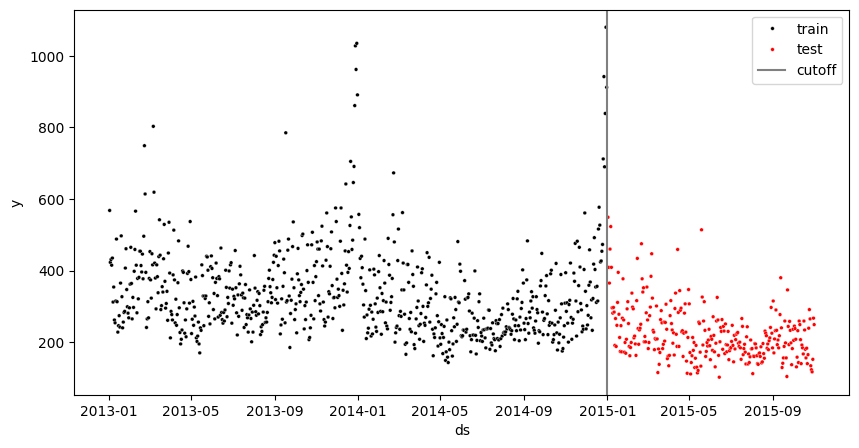

In [47]:
# for illustration purposes only
cutoff = pd.to_datetime('2015-01-01')
daily_total_qty['type'] = daily_total_qty['ds'].apply(
    lambda date: 'train' if date < cutoff else 'test')

plt.figure(figsize=(10, 5))
sns.scatterplot(x='ds', y='y', hue='type', s=7,
                palette=['black', 'red'],
                data=daily_total_qty)
plt.axvline(x=cutoff, color='gray', label='cutoff')
plt.legend()
plt.show()


We can split at a cutoff using conditional subsetting as below:

In [48]:
train = daily_total_qty[daily_total_qty['ds'] < cutoff]
test = daily_total_qty[daily_total_qty['ds'] >= cutoff]

print(f'Train size: {train.shape}')
print(f'Test size: {test.shape}')

Train size: (728, 3)
Test size: (303, 3)


Now let's train the model using data from 2013-2014 only, and forecast **303 days** into the future (until October 31st, 2015).

12:19:36 - cmdstanpy - INFO - Chain [1] start processing
12:19:36 - cmdstanpy - INFO - Chain [1] done processing


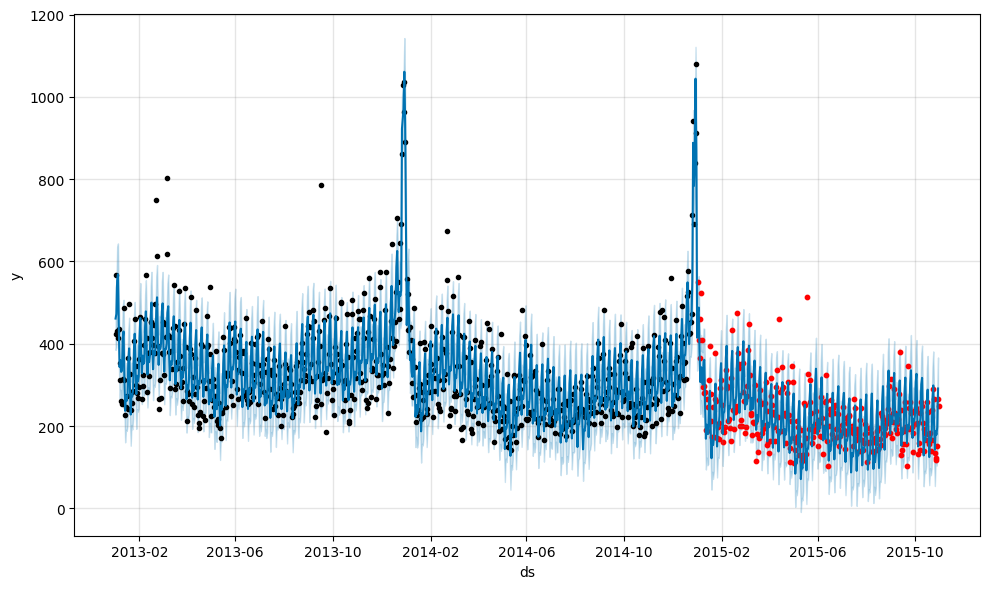

In [49]:
# fitting model
model_final = Prophet(
    holidays=holidays, # holiday effect
    yearly_seasonality=True)
model_final.add_seasonality(name='monthly', period=30.5, fourier_order=5) # add monthly seasonality
model_final.fit(train) # only training set

# forecasting
future_final = model_final.make_future_dataframe(periods=303, freq='D') # 303 days (test size)
forecast_final = model_final.predict(future_final)

# visualize
fig = model_final.plot(forecast_final)
plt.scatter(x=test['ds'], y=test['y'], s=10, color='red')
plt.show()

### Evaluation Metrics

Based on the plot above, we can see that the model is capable in forecasting the actual future value. But for most part, we will need to quantify the error to be able to have a conclusive result. To quantify an error, we need to calculate the **difference between actual demand and the forecasted demand**. However, there are several metrics we can use to express the value. Some of them are:

- Mean Absolute Error (MAE)

<center>
$$MAE = \frac{\sum_{i=1}^{n}\left | y_{pred, i} - y_{real, i} \right |}{n}$$
</center>

- Mean Percentage Absoulute Error (MAPE)
<center>
$MAPE = \frac{1}{n}\Sigma{\frac{| y-\hat y|}{y}} \times 100\%$  
</center>

Each of the metrics above are commonly used in evaluating forecasting model. The idea of choosing the error metrics is by understanding what is being quantified. Any of the metrics can be used to benchmark a forecasting model, as long as we are consistent in using it. The summary of the 2 metrics is listed as follow:

- **Mean Absolute Error (MAE)**, is a statistical metric that quantifies the average difference between the actual and predicted values in a set of data, disergarding the direction of the difference. A lower MAE indicates better prediction, as it signifies that the model's predictions are closer to the true values on average. It is important to consider the scale and context of the problem when interpreting the MAE since MAE values affected by the scale of the target.

- **Mean Percentage Absoulute Error (MAPE)**, it gives the average percentage over the actual value range, making it more interpretable and comparable across different datasets or variables with varying scales. A lower MAPE indicates a higher level of accuracy, implying that the model's predictions closely align with the true values.


In this course, we are going to use MAPE for better interpretability. However, do note one of the downside in using MAPE is that it requires no zero value since the formula needs to divide the error using its actual value. Since our data has no 0 value in the series, we will proceed to calculate the error. The MAPE is often used in practice because of its very intuitive interpretationin terms of relative error.  The use of the MAPE is relevant in finance, for instance,as gains and losses are often measured in relative values. To acquire the error, we will need to subtract the actual value within `test` data frame using the forecasted value stored under `yhat` column in `forecast_final` data frame:

In [50]:
from sklearn.metrics import mean_absolute_percentage_error

forecast_train = forecast_final[forecast_final['ds'] < cutoff]
train_mape = mean_absolute_percentage_error(y_true=train['y'],
                                     y_pred=forecast_train['yhat'])
train_mape

0.13988034809592903

In [51]:
forecast_test = forecast_final[forecast_final['ds'] >= cutoff]
test_mape = mean_absolute_percentage_error(y_true=test['y'],
                                     y_pred=forecast_test['yhat'])
test_mape

0.2966460233161989

### [Optional] Expanding Window Cross Validation

Instead of only doing one time train-test split, we can do cross validation as shown below:

<center>
<img src="assets/forward-chaining-cv.png" width="80%">
</center>

This cross validation procedure is called as **expanding window** and can be done automatically by using the `cross_validation()` method. There are three parameters to be specified:

- `initial`: the length of the initial training period
- `horizon`: forecast length
- `period`: spacing between cutoff dates

In [52]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model_holiday, initial='730 days', horizon='30 days', period='90 days')
df_cv

  0%|          | 0/4 [00:00<?, ?it/s]

12:19:39 - cmdstanpy - INFO - Chain [1] start processing
12:19:39 - cmdstanpy - INFO - Chain [1] done processing
12:19:39 - cmdstanpy - INFO - Chain [1] start processing
12:19:40 - cmdstanpy - INFO - Chain [1] done processing
12:19:40 - cmdstanpy - INFO - Chain [1] start processing
12:19:40 - cmdstanpy - INFO - Chain [1] done processing
12:19:40 - cmdstanpy - INFO - Chain [1] start processing
12:19:40 - cmdstanpy - INFO - Chain [1] done processing


ds               yhat         yhat_lower         yhat_upper     y  \
0   2015-01-05 289.33524451444293  213.1530745890155 371.94464252101943 460.0   
1   2015-01-06 315.91725794282604 230.92403412976873  393.2000083515151 523.0   
2   2015-01-07  288.7357429357631  210.1985490460222  374.0157414194439 409.0   
3   2015-01-08  286.5394322255516  203.0214862645686  368.4353209338234 296.0   
4   2015-01-09 358.46602592086253 280.61735188181365 439.76977462306945 281.0   
..         ...                ...                ...                ...   ...   
115 2015-10-27  183.3253323191857 105.04492941370353  262.0878854757107 123.0   
116 2015-10-28  174.0327089621128  98.41642336879283 253.19191492814002 117.0   
117 2015-10-29  187.0238499284052 108.96856666086705 272.60315022311505 152.0   
118 2015-10-30  270.0306829580576 192.21711205130396  345.6924693926887 267.0   
119 2015-10-31 298.74767199178336 221.31307036727483  378.4801496267468 249.0   

        cutoff  
0   2015-01-04  
1   2015-01-04  
2   2015-01-04  
3   2015-01-04  
4   2015-01-04  
..         ...  
115 2015-10-01  
116 2015-10-01  
117 2015-10-01  
118 2015-10-01  
119 2015-10-01  

[120 rows x 6 columns]

The cross validation process above will be carried out for 4 folds, where at each fold a forecast will be made for the next 30 days (`horizon`) from the cutoff dates. Below is the illustration for each fold:

In [53]:
from helper import viz

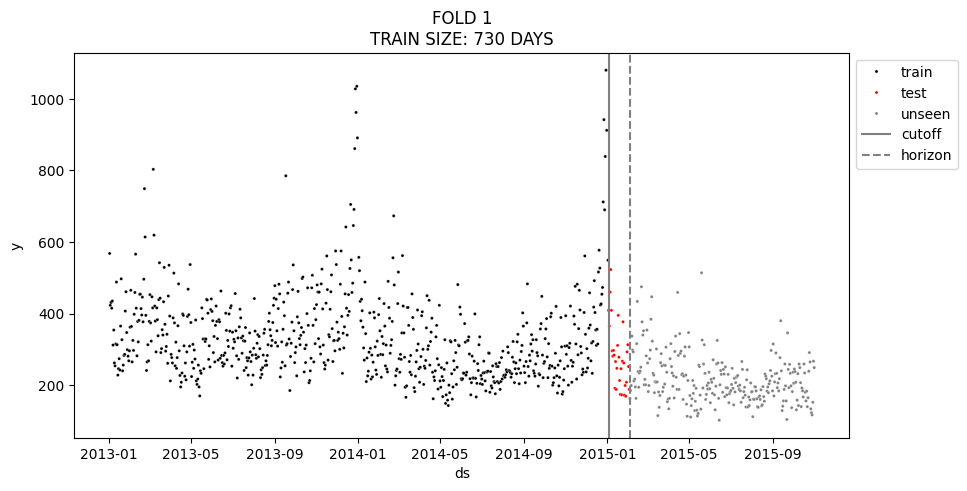

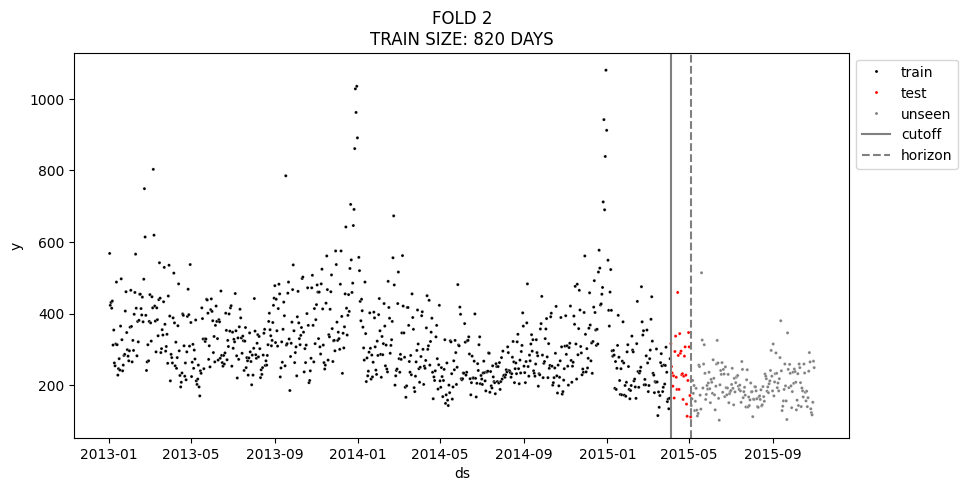

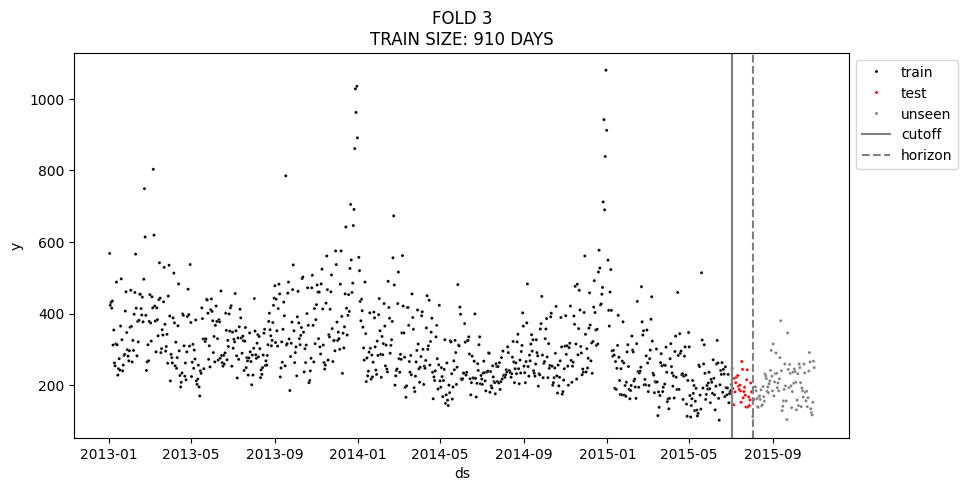

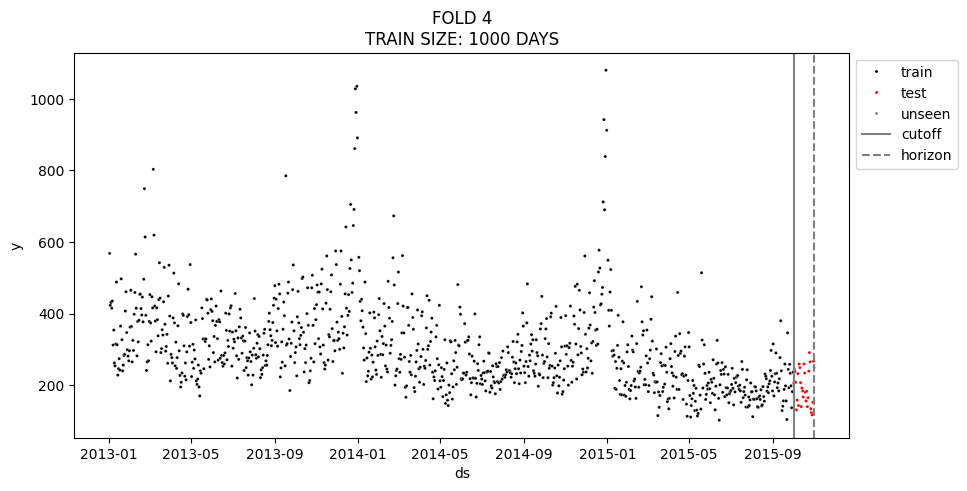

In [54]:
# for illustration purposes only
df_copy = daily_total_qty[['ds', 'y']].copy()
df_cutoff_horizon = df_cv.groupby('cutoff')[['ds']].max()

viz.forward_chaining_viz(df_copy, df_cutoff_horizon)

Cross validation error metrics can be evaluated for each folds, here shown for MAPE.

In [55]:
cv_mape = df_cv.groupby('cutoff').apply(
    lambda x: mean_absolute_percentage_error(y_true=x['y'],
                                     y_pred=x['yhat']))
cv_mape

/var/folders/kf/9qsxp79s4d1b9wvbxn93xk640000gn/T/ipykernel_5518/701865348.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



cutoff
2015-01-04   0.17767721392932784
2015-04-04   0.22289874446864852
2015-07-03   0.21482217866665151
2015-10-01   0.18238720952982154
dtype: float64

We can aggregate the metrics by using its mean. In other words, we are calculating the **mean of MAPE** to represent the overall model performance.

In [56]:
cv_mape.mean()

0.19944633664861236

## Hyperparameter Tuning

Hyperparameter tuning is an essential step in building a machine learning model to achieve the best performance. The goal of hyperparameter tuning is to find the **best combination of hyperparameters** that **minimize the forecast error**. In the case of time series forecasting, hyperparameters can be the number of changepoints, the strength of regularization, and the seasonal period, among others. 

There are several methods for tuning hyperparameters, one of which is the Grid Search Algorithm. **The Grid Search Algorithm** is a brute-force method that builds a model for every combination of specified hyperparameters and then evaluates it. This method can be computationally expensive and time-consuming, but it guarantees to find the optimal hyperparameters given the specified range of values. 

In this section, we implement the Grid Search Algorithm to tune the Prophet model's hyperparameters by using a for-loop. We define a range of hyperparameters and loop over each combination, fit the model, and evaluate the results. We evaluate the model's performance using Mean Absolute Percentage Error (MAPE), which is a widely used metric for measuring the accuracy of forecasting models. By the end of the algorithm, we will have identified the optimal combination of hyperparameters that produce the lowest MAPE. This process ensures that we have the best possible configuration for the model to make the most accurate forecast.

💡 You can use the code template below, please change it as needed in the section marked by `TO DO`.


Click [here](https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning) for a list of recommended hyperparameters to be tuned.

In [57]:
from sklearn.model_selection import ParameterGrid

# Grid search parameters (TO DO: specify possible values)
param_grid = {  
    'changepoint_prior_scale': [0.01, 0.05, 0.5],
    'seasonality_prior_scale': [0.01, 1, 10],
    'holidays_prior_scale': [0.01, 1, 10]
}

# Generate all combinations of parameters
all_params = list(ParameterGrid(param_grid))

mape = []  # Store the result for each params here

In [58]:
all_params

[{'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 0.01,
  'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 0.01,
  'seasonality_prior_scale': 1},
 {'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 0.01,
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 1,
  'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 1,
  'seasonality_prior_scale': 1},
 {'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 1,
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 10,
  'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 10,
  'seasonality_prior_scale': 1},
 {'changepoint_prior_scale': 0.01,
  'holidays_prior_scale': 10,
  'seasonality_prior_scale': 10},
 {'changepoint_prior_scale': 0.05,
  'holidays_prior_scale': 0.01,
  'seasonality_prior_scale': 0.01},


In [59]:
# Iterate each parameter
for parameter in all_params:
    # print parameter
    print(parameter)
    # (TO DO: change the data and add other components: seasonality, holiday)
    model = Prophet(changepoint_prior_scale = parameter['changepoint_prior_scale'],
                    seasonality_prior_scale = parameter['seasonality_prior_scale'],
                    holidays_prior_scale = parameter['holidays_prior_scale'],
                    yearly_seasonality = True,
                    holidays = holidays)
    # Train model with data train
    model.fit(train)
    
    # forecasting
    future = model.make_future_dataframe(periods=303, freq='D') # 303 days (test size)
    forecast = model.predict(future)
    
    # Evaluation metrics: MAPE
    forecast_test = forecast[forecast['ds'] >= cutoff]
    test_mape = mean_absolute_percentage_error(y_true=test['y'],
                                               y_pred=forecast_test['yhat'])
    
    mape.append(round(test_mape, 2))

12:19:42 - cmdstanpy - INFO - Chain [1] start processing
12:19:43 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}


12:19:43 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_prior_scale': 1}


12:19:43 - cmdstanpy - INFO - Chain [1] done processing
12:19:43 - cmdstanpy - INFO - Chain [1] start processing
12:19:43 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.01, 'seasonality_prior_scale': 10}


12:19:44 - cmdstanpy - INFO - Chain [1] start processing
12:19:44 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 1, 'seasonality_prior_scale': 0.01}


12:19:44 - cmdstanpy - INFO - Chain [1] start processing
12:19:44 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 1, 'seasonality_prior_scale': 1}


12:19:45 - cmdstanpy - INFO - Chain [1] start processing
12:19:45 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 1, 'seasonality_prior_scale': 10}


12:19:45 - cmdstanpy - INFO - Chain [1] start processing
12:19:45 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 10, 'seasonality_prior_scale': 0.01}


12:19:46 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 10, 'seasonality_prior_scale': 1}


12:19:46 - cmdstanpy - INFO - Chain [1] done processing
12:19:46 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 10, 'seasonality_prior_scale': 10}


12:19:46 - cmdstanpy - INFO - Chain [1] done processing
12:19:47 - cmdstanpy - INFO - Chain [1] start processing
12:19:47 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}


12:19:47 - cmdstanpy - INFO - Chain [1] start processing
12:19:47 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 0.01, 'seasonality_prior_scale': 1}


12:19:48 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 0.01, 'seasonality_prior_scale': 10}


12:19:48 - cmdstanpy - INFO - Chain [1] done processing
12:19:48 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 1, 'seasonality_prior_scale': 0.01}


12:19:48 - cmdstanpy - INFO - Chain [1] done processing
12:19:49 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 1, 'seasonality_prior_scale': 1}


12:19:49 - cmdstanpy - INFO - Chain [1] done processing
12:19:49 - cmdstanpy - INFO - Chain [1] start processing
12:19:49 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 1, 'seasonality_prior_scale': 10}


12:19:50 - cmdstanpy - INFO - Chain [1] start processing
12:19:50 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 10, 'seasonality_prior_scale': 0.01}


12:19:50 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 10, 'seasonality_prior_scale': 1}


12:19:50 - cmdstanpy - INFO - Chain [1] done processing
12:19:51 - cmdstanpy - INFO - Chain [1] start processing
12:19:51 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.05, 'holidays_prior_scale': 10, 'seasonality_prior_scale': 10}


12:19:51 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}


12:19:52 - cmdstanpy - INFO - Chain [1] done processing
12:19:52 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'seasonality_prior_scale': 1}


12:19:52 - cmdstanpy - INFO - Chain [1] done processing
12:19:52 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.01, 'seasonality_prior_scale': 10}


12:19:53 - cmdstanpy - INFO - Chain [1] done processing
12:19:53 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 1, 'seasonality_prior_scale': 0.01}


12:19:53 - cmdstanpy - INFO - Chain [1] done processing
12:19:54 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 1, 'seasonality_prior_scale': 1}


12:19:54 - cmdstanpy - INFO - Chain [1] done processing
12:19:54 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 1, 'seasonality_prior_scale': 10}


12:19:54 - cmdstanpy - INFO - Chain [1] done processing
12:19:55 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 10, 'seasonality_prior_scale': 0.01}


12:19:55 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 10, 'seasonality_prior_scale': 1}


12:19:55 - cmdstanpy - INFO - Chain [1] start processing
12:19:55 - cmdstanpy - INFO - Chain [1] done processing
12:19:56 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 10, 'seasonality_prior_scale': 10}


12:19:56 - cmdstanpy - INFO - Chain [1] done processing


The code above performs a grid search algorithm for hyperparameter tuning using the Prophet time series forecasting model. The hyperparameters are specified in the `param_grid` dictionary, which contains a range of values for the `changepoint_prior_scale` and `changepoint_range` parameters. The `itertools` library is used to generate all possible combinations of hyperparameters, which are stored in the `all_params` list. 

For each combination of hyperparameters, a Prophet model is fitted with the specified hyperparameters and other components such as seasonality, holiday, and regressors. The model is trained on the `daily_total_qty` time series data. Then, cross-validation is performed using an expanding window approach with a training period of 730 days and a horizon of 30 days. The mean absolute percentage error (MAPE) is used as the evaluation metric to assess the performance of each model. 

The results of each evaluation, i.e., the mean MAPE for each set of hyperparameters, are stored in the `mape` list. The `tqdm` library is used to track the progress of the loop. Finally, the hyperparameters that result in the lowest MAPE value are selected as the optimal set of hyperparameters for the Prophet model.

We can observe the error metrics for each hyperparameter combination, and sort by ascending:

In [60]:
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mape

tuning_results.sort_values(by='mape')

changepoint_prior_scale  holidays_prior_scale  seasonality_prior_scale  \
13                     0.05                   1.0                      1.0   
17                     0.05                  10.0                     10.0   
3                      0.01                   1.0                     0.01   
4                      0.01                   1.0                      1.0   
6                      0.01                  10.0                     0.01   
16                     0.05                  10.0                      1.0   
14                     0.05                   1.0                     10.0   
5                      0.01                   1.0                     10.0   
7                      0.01                  10.0                      1.0   
8                      0.01                  10.0                     10.0   
2                      0.01                  0.01                     10.0   
0                      0.01                  0.01                     0.01   
1                      0.01                  0.01                      1.0   
12                     0.05                   1.0                     0.01   
15                     0.05                  10.0                     0.01   
10                     0.05                  0.01                      1.0   
11                     0.05                  0.01                     10.0   
25                      0.5                  10.0                      1.0   
23                      0.5                   1.0                     10.0   
26                      0.5                  10.0                     10.0   
22                      0.5                   1.0                      1.0   
9                      0.05                  0.01                     0.01   
20                      0.5                  0.01                     10.0   
19                      0.5                  0.01                      1.0   
21                      0.5                   1.0                     0.01   
24                      0.5                  10.0                     0.01   
18                      0.5                  0.01                     0.01   

    mape  
13  0.29  
17  0.29  
3   0.29  
4   0.29  
6   0.29  
16  0.29  
14  0.29  
5    0.3  
7    0.3  
8    0.3  
2   0.31  
0   0.32  
1   0.32  
12  0.33  
15  0.33  
10  0.34  
11  0.34  
25  0.37  
23  0.37  
26  0.37  
22  0.38  
9   0.68  
20  1.01  
19  1.02  
21  1.21  
24  1.22  
18  2.12

Lastly, re-fit the model and use it for forecasting.

In [61]:
import numpy as np

# Get hyperparameters with lowest MAPE
best_params = all_params[np.argmin(mape)]
best_params

{'changepoint_prior_scale': 0.01,
 'holidays_prior_scale': 1,
 'seasonality_prior_scale': 0.01}

12:19:56 - cmdstanpy - INFO - Chain [1] start processing
12:19:56 - cmdstanpy - INFO - Chain [1] done processing


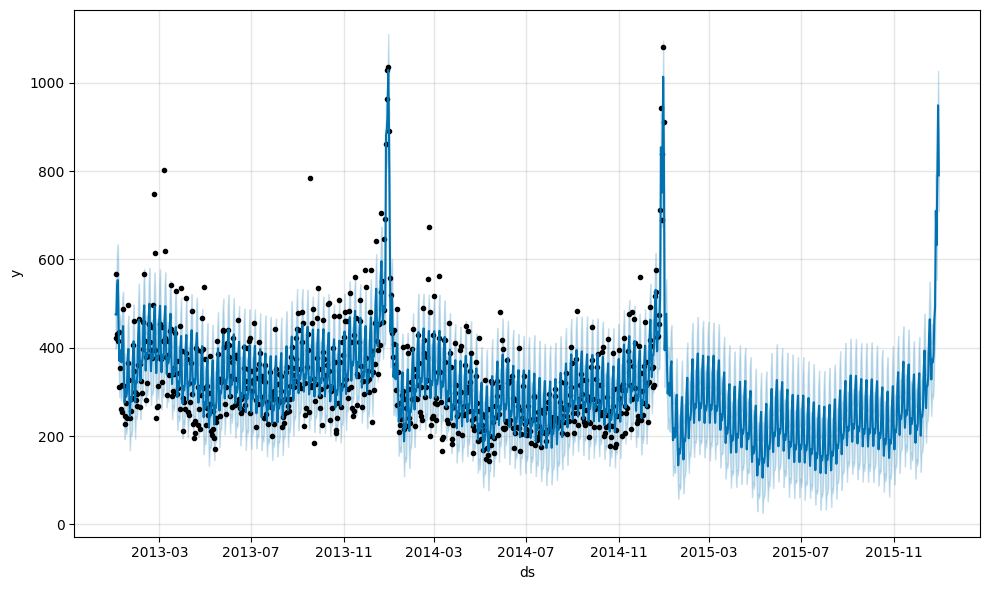

In [62]:
# Make model
model_best = Prophet(**best_params, holidays=holidays, yearly_seasonality=True)

# Model fitting/training
model_best.fit(train)

# Model forecasting
future_best = model_best.make_future_dataframe(periods=365, freq='D')
forecast_best = model_best.predict(future_best)

# Visualize
fig = model_best.plot(forecast_best)

In conclusion, hyperparameter tuning is a crucial step in improving the performance of a forecasting model, and one way to do it is by using grid search. In this code, we specified a range of hyperparameter values in a dictionary format and then generated all possible combinations using itertools. We then used for loop to fit the model and evaluate the MAPE for each combination of hyperparameters. By comparing the MAPE values of all combinations, we can select the set of hyperparameters that yields the best performance. Grid search provides an efficient and automated way to find the optimal hyperparameters for a given model, and it can be applied to any machine learning algorithm, including Prophet.

# Dive Deeper

Previously we have studied the method of building a time series model to forecast the quantity of total sales from `shop_id=31`. In this dive deeper, please create a model to forecast total revenue from `shop_id = 25`.

In [63]:
# code here


# Conclusion

In conclusion, time series forecasting is a vital component in many industries, ranging from finance and healthcare to sales and marketing. It is used to make informed decisions based on historical data to forecast future trends, patterns, and behaviors. Prophet is a powerful time series forecasting library developed by Facebook that utilizes Bayesian modeling techniques and provides a wide range of features such as trend modeling, seasonality, and holiday effects. 

In this tutorial, we covered the fundamental concepts of time series forecasting and explained how Prophet works in detail. We demonstrated how to preprocess and visualize time series data and discussed how to apply various modeling techniques, such as trend, seasonality, and holiday effects, to create an accurate forecast. 

We also showed how to use Prophet to tune hyperparameters using a grid search algorithm to obtain the optimal combination of parameters that minimize the forecast error. Finally, we discussed how to incorporate custom holidays, such as national or religious holidays, into the model to improve forecast accuracy. 

Overall, Prophet is a powerful and flexible library that can be used to tackle a wide range of forecasting problems. Its intuitive API, robust documentation, and built-in capabilities for modeling various types of seasonality and holiday effects make it an excellent choice for both beginners and experts in time series forecasting.

# References

Prophet related:

- [Prophet Documentation](https://facebook.github.io/prophet/docs/quick_start.html)
- [Paper: Forecasting at Scale](https://peerj.com/preprints/3190/)
- [Algoritma: Time Series Forecasting using `prophet` in R](https://business-forecasting.netlify.app/#5_time_series_forecasting_using_prophet)
- [Algoritma: Time Series Forecasting using `prophet` in Python](https://github.com/tomytjandra/tsf-prophet)


Further reading (for R):

- [Textbook Forecasting: Principles and Practice](https://otexts.com/fpp2/)
- [Algotech: Multiple Seasonality Time Series](https://algotech.netlify.app/blog/multiple-seasonal/)
- [Algotech: Time Series LSTM (Neural Network)](https://algotech.netlify.app/blog/time-series-prediction-with-lstm/)